# Consignes projet 4

**Anticipez les besoins en consommation électrique de bâtiments**
* Lien vers consignes : https://openclassrooms.com/fr/projects/629/assignment
* Lien vers score Star Energy : https://www.energystar.gov/

* Lien vers la signification des colonnes (trouvé via recherche web) : https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy

DataYear : L'année à laquelle les données ont été enregistrées ou collectées. Il indique l'année de référence des informations contenues dans les autres colonnes.

BuildingType : Le type de bâtiment auquel appartient la propriété. Il peut s'agir de catégories telles que résidentiel, commercial, industriel, etc.

PrimaryPropertyType : Le type principal de propriété du bâtiment, qui indique la catégorie générale à laquelle il appartient, telle que bureau, hôtel, école, etc.

CouncilDistrictCode : Le code du district du conseil local auquel appartient la propriété. Il est utilisé pour identifier la région administrative à laquelle le bâtiment est associé.

Neighborhood : Le quartier ou la zone géographique où se trouve la propriété.

YearBuilt : L'année de construction du bâtiment.

NumberofBuildings : Le nombre total de bâtiments présents dans la propriété.

NumberofFloors : Le nombre total d'étages dans le bâtiment.

PropertyGFATotal : La superficie totale de la propriété, qui représente la somme des superficies des bâtiments et des espaces extérieurs.

PropertyGFAParking : La superficie réservée au stationnement dans la propriété.

PropertyGFABuilding(s) : La superficie totale des bâtiments dans la propriété, excluant les espaces extérieurs et le stationnement.

LargestPropertyUseType : Le type d'utilisation de propriété le plus important en termes de superficie.

LargestPropertyUseTypeGFA : La superficie dédiée à l'utilisation la plus importante dans la propriété.

SecondLargestPropertyUseType : Le deuxième type d'utilisation de propriété le plus important en termes de superficie.

SecondLargestPropertyUseTypeGFA : La superficie dédiée au deuxième type d'utilisation le plus important dans la propriété.

ThirdLargestPropertyUseType : Le troisième type d'utilisation de propriété le plus important en termes de superficie.

ThirdLargestPropertyUseTypeGFA : La superficie dédiée au troisième type d'utilisation le plus important dans la propriété.

ENERGYSTARScore : Le score ENERGY STAR attribué à la propriété, qui évalue son efficacité énergétique par rapport à d'autres propriétés similaires.

SiteEnergyUseWN(kBtu) : La consommation d'énergie totale du site en unités de kBtu (British Thermal Units), ajustée en fonction de l'efficacité climatique.

Outlier : Une indication de savoir si la propriété est considérée comme un point aberrant ou une valeur aberrante dans le contexte de l'analyse.

Latitude : La latitude géographique de la propriété, qui représente sa position sur la Terre.

Longitude : La longitude géographique de la propriété, qui représente sa position sur la Terre.

TotalGHGEmissions : Les émissions totales de gaz à effet de serre de la propriété, mesurées en unités appropriées (par exemple, kilogrammes d'équivalent dioxyde de carbone).

In [273]:
!pip install cython
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', -1)

# Chargement jeu de données

In [4]:
data = pd.read_csv('data/data_cleaned_SEU.csv')

In [5]:
d_corr = data.copy()

In [6]:
# # data = data.drop(["index"], axis=1)
# data['BuildingAge'] = 2016 - data['YearBuilt']
# # data = data.drop(['YearBuilt'], axis=1)
# # data = data.drop(["Latitude"], axis=1)
# data = data.drop(["Longitude"], axis=1)
# # data = data.drop(["PropertyGFAParking"], axis=1)
# data = data.drop(["Neighborhood"], axis=1)
# # data = data.drop(["SecondLargestPropertyUseType"], axis=1) 
# data = data.drop(["LargestPropertyUseType"], axis=1) #12,4
# data = data.drop(["ThirdLargestPropertyUseType"], axis=1)#10
# # data = data.drop(["SecondLargestPropertyUseTypeGFA"], axis=1)#10
# data = data.drop(["ThirdLargestPropertyUseTypeGFA"], axis=1)#10 
# data = data.drop(["ZipCode"], axis=1) #10
# data = data.drop(["OSEBuildingID"], axis=1)#9

data.head()

,OSEBuildingID,PrimaryPropertyType,ZipCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(percent),Electricity(percent),NaturalGas(percent),Log2-SiteEnergyUse(kBtu)
0,1,Residence/Hotel/Senior Care/Housing,98101.0,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,0,88434,Residence/Hotel/Senior Care/Housing,NOT USED,0.0,NOT USED,0.0,60.0,7226362.5,0.277302,0.546060,0.176638,22.784838
1,2,Residence/Hotel/Senior Care/Housing,98101.0,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,15064,88502,Residence/Hotel/Senior Care/Housing,Parking,15064.0,Leisure,4622.0,61.0,8387933.0,0.000000,0.386609,0.613391,22.999884
2,5,Residence/Hotel/Senior Care/Housing,98101.0,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,0,61320,Residence/Hotel/Senior Care/Housing,NOT USED,0.0,NOT USED,0.0,56.0,6794584.0,0.325913,0.407519,0.266567,22.695954
3,8,Residence/Hotel/Senior Care/Housing,98121.0,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,62000,113580,Residence/Hotel/Senior Care/Housing,Parking,68009.0,Other,0.0,75.0,14172606.0,0.000000,0.378802,0.621198,23.756602
4,9,Other,98101.0,DOWNTOWN,47.61623,-122.33657,1999,1.0,2,37198,60090,Offices,NOT USED,0.0,NOT USED,0.0,0.0,12086616.0,0.000000,0.609884,0.390116,23.526907


In [7]:
data.columns

# 'DataYear'
# 'BuildingType'
# 'PrimaryPropertyType'
# 'ZipCode'
# 'Neighborhood'
# 'Latitude'
# 'Longitude'
# 'YearBuilt'
# 'NumberofBuildings'
# 'NumberofFloors'
# 'PropertyGFATotal'
# 'PropertyGFAParking'
# 'PropertyGFABuilding(s)'
# 'ListOfAllPropertyUseTypes'
# 'LargestPropertyUseType'
# 'LargestPropertyUseTypeGFA'
# 'SecondLargestPropertyUseType'
# 'SecondLargestPropertyUseTypeGFA'
# 'ThirdLargestPropertyUseType'
# 'ThirdLargestPropertyUseTypeGFA'
# 'SiteEnergyUse(kBtu)'
# 'BuildingsAge'
# 'PropertyGFABuildings(percent)'
# 'PropertyGFAParking(percent)'


Index(['OSEBuildingID', 'PrimaryPropertyType', 'ZipCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEnergyUse(kBtu)', 'SteamUse(percent)', 'Electricity(percent)',
       'NaturalGas(percent)', 'Log2-SiteEnergyUse(kBtu)'],
      dtype='object')

In [8]:
data.dtypes

OSEBuildingID                      int64  
PrimaryPropertyType                object 
ZipCode                            float64
Neighborhood                       object 
Latitude                           float64
Longitude                          float64
YearBuilt                          int64  
NumberofBuildings                  float64
NumberofFloors                     int64  
PropertyGFAParking                 int64  
PropertyGFABuilding(s)             int64  
LargestPropertyUseType             object 
SecondLargestPropertyUseType       object 
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseType        object 
ThirdLargestPropertyUseTypeGFA     float64
ENERGYSTARScore                    float64
SiteEnergyUse(kBtu)                float64
SteamUse(percent)                  float64
Electricity(percent)               float64
NaturalGas(percent)                float64
Log2-SiteEnergyUse(kBtu)           float64
dtype: object

colonnes de l'exemple V 
<!-- index                              int64  
DataYear                           int64  
BuildingType                       object 
PrimaryPropertyType                object 
CouncilDistrictCode                int64  
Neighborhood                       object 
YearBuilt                          int64  
NumberofBuildings                  float64
NumberofFloors                     float64
PropertyGFATotal                   int64  
PropertyGFAParking                 int64  
PropertyGFABuilding(s)             int64  
LargestPropertyUseType             object 
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseType       object 
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseType        object 
ThirdLargestPropertyUseTypeGFA     float64
ENERGYSTARScore                    float64
SiteEnergyUseWN(kBtu)              float64
Outlier                            object 
Latitude                           float64
Longitude                          float64
TotalGHGEmissions                  float64
Log2-SiteEnergyUseWN(kBtu)         float64 -->

In [9]:
data.shape

(1253, 22)

In [10]:
# # Liste des colonnes à conserver
# selected_columns = ['BuildingType', 'PrimaryPropertyType', 
#                     'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 
#                     'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions','ENERGYSTARScore','Log2-SiteEnergyUseWN(kBtu)']

# # Suppression des colonnes non sélectionnées
# data = data[selected_columns]
# 	index	DataYear	BuildingType	PrimaryPropertyType	CouncilDistrictCode	Neighborhood	YearBuilt	NumberofBuildings	NumberofFloors	PropertyGFATotal	PropertyGFAParking	PropertyGFABuilding(s)	LargestPropertyUseType	LargestPropertyUseTypeGFA	SecondLargestPropertyUseType	SecondLargestPropertyUseTypeGFA	ThirdLargestPropertyUseType	ThirdLargestPropertyUseTypeGFA	ENERGYSTARScore	SiteEnergyUseWN(kBtu)	Outlier	Latitude	Longitude	TotalGHGEmissions	Log2-SiteEnergyUseWN(kBtu)
# index
# DataYear
# BuildingType
# PrimaryPropertyType
# CouncilDistrictCode
# Neighborhood
# YearBuilt
# NumberofBuildings 
# NumberofFloors
# PropertyGFATotal
# PropertyGFAParking
# PropertyGFABuilding(s)
# LargestPropertyUseType
# LargestPropertyUseTypeGFA
# SecondLargestPropertyUseType
# SecondLargestPropertyUseTypeGFA
# ThirdLargestPropertyUseType
# ThirdLargestPropertyUseTypeGFA
# ENERGYSTARScore
# SiteEnergyUseWN(kBtu)
# Outlier
# Latitude
# Longitude
# TotalGHGEmissions
# Log2-SiteEnergyUseWN(kBtu)

In [11]:
data.dtypes

OSEBuildingID                      int64  
PrimaryPropertyType                object 
ZipCode                            float64
Neighborhood                       object 
Latitude                           float64
Longitude                          float64
YearBuilt                          int64  
NumberofBuildings                  float64
NumberofFloors                     int64  
PropertyGFAParking                 int64  
PropertyGFABuilding(s)             int64  
LargestPropertyUseType             object 
SecondLargestPropertyUseType       object 
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseType        object 
ThirdLargestPropertyUseTypeGFA     float64
ENERGYSTARScore                    float64
SiteEnergyUse(kBtu)                float64
SteamUse(percent)                  float64
Electricity(percent)               float64
NaturalGas(percent)                float64
Log2-SiteEnergyUse(kBtu)           float64
dtype: object

In [12]:
data.isna().sum().sum()

0

La colonne "ENERGYSTARScore" fait référence au score ENERGY STAR attribué à un bâtiment. ENERGY STAR est un programme international qui évalue et classe l'efficacité énergétique des bâtiments, en leur attribuant un score sur une échelle de 1 à 100. Ce score permet de comparer la performance énergétique d'un bâtiment par rapport à des bâtiments similaires.

Un score ENERGY STAR élevé, proche de 100, indique une efficacité énergétique supérieure, ce qui signifie que le bâtiment consomme moins d'énergie pour fonctionner et a un impact environnemental réduit. Un score plus bas, proche de 1, indique une efficacité énergétique plus faible.

In [13]:
#sauvegarde séparée du energy star score
energy_star_score = data['ENERGYSTARScore']
data.drop('ENERGYSTARScore', axis=1, inplace=True)
# data.drop('SiteEnergyUseWN(kBtu)', axis=1, inplace=True)

In [14]:
data.shape

(1253, 21)

In [15]:
data.isna().sum().sum()

0

# Préparation des vecteurs et matrices

## Séparation X et y 

La colonne "SiteEnergyUseWN(kBtu)" fait référence à la consommation d'énergie totale du site, mesurée en kilo British Thermal Units (kBtu). Cette mesure représente la quantité totale d'énergie utilisée par un bâtiment sur une période donnée, généralement sur une base annuelle.

In [16]:
# y = data.copy()[{'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions' , 'Log2-SiteEnergyUseWN(kBtu)'}]
# X = data.copy().drop(['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions', 'Log2-SiteEnergyUseWN(kBtu)'], axis=1)
# Sélection des colonnes 'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions', 'Log2-SiteEnergyUseWN(kBtu)'
# pour créer le DataFrame y contenant ces colonnes
y = data.copy()[{'Log2-SiteEnergyUse(kBtu)'}] #1 variable a expliquer, ou la cible 
# y = data.copy()[{'SiteEnergyUseWN(kBtu)'}] #1 variable a expliquer, ou la cible 

# Création du DataFrame X en faisant une copie de data et en supprimant les colonnes 
# 'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions', 'Log2-SiteEnergyUseWN(kBtu)'
# X = data.copy().drop(['SiteEnergyUseWN(kBtu)', 'Log2-SiteEnergyUseWN(kBtu)','TotalGHGEmissions','Log2-TotalGHGEmissions'], axis=1) 
# plusieurs variable qui explique Y 
X = data.copy().drop(['SiteEnergyUse(kBtu)', 'Log2-SiteEnergyUse(kBtu)'], axis=1) 

## Normalisation & One Hot Encoder 

la normalisation est utilisée pour mettre à l'échelle les valeurs numériques et les rendre comparables, tandis que le codage one-hot est utilisé pour représenter les variables catégorielles sous forme de variables binaires distinctes. Ces techniques permettent d'améliorer les performances des modèles d'apprentissage automatique en rendant les données plus adaptées à l'apprentissage et à la prédiction.

In [17]:
X.select_dtypes(['category','object']).nunique()

PrimaryPropertyType             11
Neighborhood                    13
LargestPropertyUseType          12
SecondLargestPropertyUseType    13
ThirdLargestPropertyUseType     14
dtype: int64

In [18]:
X.shape

(1253, 19)

In [19]:
categorical_columns = X.select_dtypes(['category','object']).columns
numerical_columns = X.select_dtypes(['int8','int64','int32','float32','float64']).columns

In [20]:
categorical_columns

Index(['PrimaryPropertyType', 'Neighborhood', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType'],
      dtype='object')

In [21]:
numerical_columns

Index(['OSEBuildingID', 'ZipCode', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'SteamUse(percent)',
       'Electricity(percent)', 'NaturalGas(percent)'],
      dtype='object')

In [22]:
numerical_columns_y = y.select_dtypes(['int8','int64','int32','float32','float64']).columns
numerical_columns_y

Index(['Log2-SiteEnergyUse(kBtu)'], dtype='object')

In [23]:
# from sklearn.preprocessing import OneHotEncoder, StandardScaler

# ohe = OneHotEncoder(sparse=False)
# ss = StandardScaler()
# X[numerical_columns] = ss.fit_transform(X[numerical_columns])
# ohe.fit_transform(X[categorical_columns])

# X = pd.merge(X[numerical_columns], 
#           pd.DataFrame(columns = ohe.get_feature_names().tolist(),
#               data = ohe.fit_transform(X[categorical_columns])),
#         left_index = True, right_index = True)
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Instanciation de l'encodeur OneHotEncoder
ohe = OneHotEncoder(sparse=False)

# Instanciation du StandardScaler
ss = StandardScaler()

# Standardisation des colonnes numériques dans X à l'aide de StandardScaler
X[numerical_columns] = ss.fit_transform(X[numerical_columns])

# Encodage One-Hot des colonnes catégorielles dans X à l'aide de OneHotEncoder
ohe.fit_transform(X[categorical_columns])

# Fusion des colonnes numériques standardisées avec les colonnes catégorielles encodées
# en utilisant pd.merge pour combiner les DataFrames
X = pd.merge(X[numerical_columns],
             pd.DataFrame(columns=ohe.get_feature_names().tolist(),
                          data=ohe.fit_transform(X[categorical_columns])),
             left_index=True, right_index=True)


Transformation des types des catégories sorties du one hot encoding

In [24]:
# import re
# regex = re.compile(r'x\d_')
# for column in X.columns:
#     if regex.search(column):
#         X[column] = X[column].astype('int32')
import re

# Compilation de l'expression régulière
regex = re.compile(r'x\d_')

# Parcours de chaque colonne dans X
for column in X.columns:
    # Vérification si la colonne correspond au motif de l'expression régulière
    if regex.search(column):
        # Conversion de la colonne en type 'int32'
        X[column] = X[column].astype('int32')


In [25]:
X.sample(5)

,OSEBuildingID,ZipCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,SteamUse(percent),Electricity(percent),NaturalGas(percent),x0_Education,x0_Facility,x0_Health,x0_Leisure,x0_Offices,x0_Other,x0_Residence/Hotel/Senior Care/Housing,x0_Retail,x0_Storage,x0_Supermarket / Grocery Store,x0_Warehouse,x1_BALLARD,x1_CENTRAL,x1_DELRIDGE,x1_DOWNTOWN,x1_EAST,x1_GREATER DUWAMISH,x1_LAKE UNION,x1_MAGNOLIA / QUEEN ANNE,x1_NORTH,x1_NORTHEAST,x1_NORTHWEST,x1_SOUTHEAST,x1_SOUTHWEST,x2_Education,x2_Facility,x2_Health,x2_Leisure,x2_Office,x2_Offices,x2_Other,x2_Parking,"x2_Personal Services (Health/Beauty, Dry Cleaning, etc)",x2_Residence/Hotel/Senior Care/Housing,x2_Retail,x2_Storage,x3_Education,x3_Facility,x3_Health,x3_Leisure,x3_NOT USED,x3_Office,x3_Offices,x3_Other,x3_Parking,"x3_Personal Services (Health/Beauty, Dry Cleaning, etc)",x3_Residence/Hotel/Senior Care/Housing,x3_Retail,x3_Storage,x4_Education,x4_Facility,x4_Health,x4_Leisure,x4_NOT USED,x4_Office,x4_Offices,x4_Other,x4_Other - Technology/Science,x4_Parking,"x4_Personal Services (Health/Beauty, Dry Cleaning, etc)",x4_Residence/Hotel/Senior Care/Housing,x4_Retail,x4_Storage
711,0.425203,-0.536138,-1.434919,0.367567,0.129939,0.041269,-0.543715,-0.335766,-0.486121,-0.503767,-0.341988,-0.229382,1.120162,-1.038804,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
407,-1.192666,-0.775696,-0.261736,0.195489,0.344128,0.041269,1.166957,-0.335766,2.288521,-0.503767,-0.341988,3.005429,0.091753,-1.038804,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1071,0.767753,1.020989,-1.034362,-0.002815,-0.573824,0.041269,-0.329881,-0.335766,-0.671373,-0.503767,-0.341988,-0.229382,-1.482596,1.553410,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
591,0.363671,-0.536138,-1.367660,0.356984,0.282932,0.041269,-0.329881,-0.335766,-0.619521,-0.503767,-0.341988,-0.229382,-1.166570,1.238665,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
459,0.249154,0.302315,-0.282942,0.880579,-1.522375,0.041269,-0.116047,-0.335766,-0.435555,-0.503767,-0.341988,-0.229382,0.153281,-0.075837,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


## Infos sur X et y

In [26]:
X.shape

(1253, 77)

In [27]:
y.shape

(1253, 1)

# Séparation jeu de données

**Séparation test / train**

In [28]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = \
#                         train_test_split(X, 
#                                          y['Log2-SiteEnergyUseWN(kBtu)'],  
#                                          test_size = 0.2, 
#                                          random_state = 42
#                                         )
from sklearn.model_selection import train_test_split

# Division des données en ensembles d'entraînement et de test
# avec 80% des données pour l'ensemble d'entraînement et 20% pour l'ensemble de test
# Les variables explicatives sont stockées dans X et la variable cible est y['Log2-SiteEnergyUseWN(kBtu)']
# random_state est utilisé pour garantir la reproductibilité des résultats
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y['Log2-SiteEnergyUse(kBtu)'],  
                                                    test_size=0.2, 
                                                    random_state=42)


In [29]:
X_train.shape

(1002, 77)

In [30]:
X_test.shape

(251, 77)

In [31]:
y_train.shape

(1002,)

In [32]:
y_test.shape

(251,)

In [33]:
results = pd.DataFrame({})

In [34]:
print(X_train.isna().sum().sum())
print(X_test.isna().sum().sum())
print(y_train.isna().sum().sum())
print(y_test.isna().sum().sum())


0
0
0
0


# Modélisation

**Imports**

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

## Linear Regression / Ridge Regression / Lasso / Elastic Net

Le modèle Elastic Net comprend les modèles linéaires / ridge et lasso via les valeurs des coefficients dans le grid search CV

In [36]:
#rappel de la fonction de coût du elasticnet
#1 / (2 * n_samples) * ||y - Xw||^2_2 + alpha * l1_ratio * ||w||_1 + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

# Importation de la classe ElasticNet depuis la bibliothèque sklearn.linear_model
from sklearn.linear_model import ElasticNet

# Définition des paramètres pour la recherche sur grille
parameters = {'tol' : [0.1,0.01,0.001,0.0001],  # Tolérance de la convergence de l'algorithme #alpha, coef qui multiplie le terme de pénalité)
              "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],  # Paramètre alpha (termes de pénalité)
              "l1_ratio": np.arange(0.0, 1.0, 0.1)}  # Ratio de mélange entre les termes L1 et L2 #L1 ratio , =1 équivaut à un Lasso, 0 à un Ridge

# Création de l'estimateur ElasticNet et de la grille de recherche sur les paramètres
elastic_grid = GridSearchCV(estimator=ElasticNet(),
                      param_grid=parameters,
                      scoring='neg_mean_squared_error',  # Métrique de performance à optimiser
                      cv=5,  # Nombre de folds pour la validation croisée
                      verbose=0)

# Recherche des meilleurs paramètres sur la grille en utilisant les données d'entraînement
elastic_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'tol': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error')

Cette commande qui permet d'afficher les meilleurs paramètres choisis par la méthode de recherche par grille (GridSearchCV) pour un modèle de régression aléatoire (ElasticNet).

In [37]:
elastic_grid.best_params_

{'alpha': 0.01, 'l1_ratio': 0.9, 'tol': 0.001}

{'alpha': 0.001, 'l1_ratio': 0.9, 'tol': 0.001}

Le modèle optimal a les caractéristiques suivantes:
* alpha = 0.001 : le terme de régularisation Lasso (L1) est quasiment nul mais il ne s'agit pas de notre paramètre le plus faible dasn le grid search CV
* le terme l1_ratio est approximativement de 0.4, signifiant que le poids du L1 est plus important que celui du L2 dans la régularisation 

In [38]:
import math
results = results.append(pd.DataFrame({
    'Modèle' : ['Elasticnet Regression'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(elastic_grid.predict(X_test), y_test))]}),
              ignore_index=True)

ils existent plusieurs métriques différentes pour évaluer, 5 exemples :

- R2 (Coefficient de détermination)
- MAE (erreur absolue moyenne)
- RMSE (erreur quadratique moyenne)
- MPSE (erreur quadratique moyenne en pourcentage)
- Taux de prédictions entre 90 et 110 % de la valeur réelle

- Coefficient de détermination (R²) : C'est le score qui mesure la proportion de la variance de la variable cible (y) expliquée par les variables explicatives (X) du modèle. Plus le R² est proche de 1, meilleur est le modèle.

- Erreur absolue moyenne (MAE) : C'est la moyenne des écarts absolus entre les valeurs prédites et les valeurs réelles. Elle mesure la magnitude moyenne de l'erreur sans tenir compte de sa direction.

- Erreur quadratique moyenne (RMSE) : C'est la racine carrée de la moyenne des écarts quadratiques entre les valeurs prédites et les valeurs réelles. Elle mesure la dispersion des erreurs et est plus sensible aux valeurs aberrantes que la MAE.

- Erreur quadratique moyenne en pourcentage (MPSE) : C'est le RMSE normalisé en pourcentage par rapport à la moyenne des valeurs réelles. Il permet de comparer l'erreur du modèle par rapport à l'échelle des valeurs réelles.

- Taux de prédictions entre 90% et 110% de la valeur réelle : C'est le pourcentage des prédictions qui se situent dans une fourchette de ±10% par rapport aux valeurs réelles. Il mesure la précision du modèle dans la prédiction des valeurs proches de la réalité.

In [39]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# Prédiction sur les données de test
y_pred_test = elastic_grid.predict(X_test)

# Calcul du coefficient de détermination (R²)
r2 = r2_score(y_test, y_pred_test)
print("R² :", r2)

# Calcul de l'erreur absolue moyenne (MAE)
mae = mean_absolute_error(y_test, y_pred_test)
print("MAE :", mae)

# Calcul de l'erreur quadratique moyenne (RMSE)
rmse = math.sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE :", rmse)

# Calcul de l'erreur quadratique moyenne en pourcentage (MPSE)
mpse = math.sqrt(mean_squared_error(y_test, y_pred_test)) / y_test.mean() * 100
print("MPSE :", mpse)

# Calcul du taux de prédictions entre 90% et 110% de la valeur réelle
predictions_within_range = ((y_pred_test >= 0.9 * y_test) & (y_pred_test <= 1.1 * y_test)).mean() * 100
print("Taux de prédictions entre 90% et 110% :", predictions_within_range)


R² : 0.6254984825910344
MAE : 0.7443914698226541
RMSE : 0.9335194673711477
MPSE : 4.367242947933668
Taux de prédictions entre 90% et 110% : 97.21115537848605


In [40]:
# Calcul du RMSE
y_pred_test = elastic_grid.predict(X_test)
rmse = math.sqrt(mean_squared_error(np.exp2(y_test), np.exp2(y_pred_test)))
print("RMSE (exp):", rmse)

# Calcul du MAP
map_score = mean_absolute_percentage_error(np.exp2(y_test), np.exp2(y_pred_test))
print("MAPE (exp) :", map_score)

# Calcul du R²
r2 = r2_score(np.exp2(y_test), np.exp2(y_pred_test))
print("R² (exp) :", r2)

# Calcul de l'erreur quadratique moyenne en pourcentage (MPSE)
mpse = math.sqrt(mean_squared_error(np.exp2(y_test), np.exp2(y_pred_test))) / np.exp2(y_test.mean()) * 100
print("MPSE :", mpse)

# Calcul du taux de prédictions entre 90% et 110% de la valeur réelle
predictions_within_range = ((np.exp2(y_pred_test) >= 0.9 * np.exp2(y_test)) & (np.exp2(y_pred_test) <= 1.1 * np.exp2(y_test))).mean() * 100 
print("Taux de prédictions entre 90% et 110% :", predictions_within_range)


RMSE (exp): 4070636.769251676
MAPE (exp) : 0.5908906929736368
R² (exp) : 0.39181789292849734
MPSE : 149.62338054031852
Taux de prédictions entre 90% et 110% : 14.741035856573706


## Random Forest Regressor

In [41]:
from sklearn.ensemble import RandomForestRegressor

parameters = {
    'n_estimators' : [10,50,100,300,500], #nombre d'arbres de décision
    'min_samples_leaf' : [1,3,5,10], #nombre de feuilles minimales dans un noeud
    'max_features': ['auto', 'sqrt'] #nombre de features observées pour chaque arbre
}

In [42]:
rfr_search = GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                               #scoring='mean_squared_error',
                              verbose=2,
                               cv=5)

rfr_search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   0.6s
[CV] END max_

[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   1.6s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   1.6s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   1.6s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   1.6s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; tot

[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=300; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=300; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.5s


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'n_estimators': [10, 50, 100, 300, 500]},
             verbose=2)

In [43]:
rfr_search.best_params_

{'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 300}

<!-- {'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 300} -->
{'max_features': 'auto', 'min_samples_leaf': 10, 'n_estimators': 300}

Cette commande qui permet d'afficher les meilleurs paramètres choisis par la méthode de recherche par grille (GridSearchCV) pour un modèle de régression aléatoire (RandomForestRegressor).

Plus précisément, la méthode best_params_ de l'objet rfr_search renvoie un dictionnaire de paramètres avec leurs valeurs correspondantes, qui ont donné la meilleure performance lors de la validation croisée. Dans votre cas, les paramètres suivants ont été sélectionnés comme les meilleurs :

- max_features: Cette option détermine le nombre maximum de fonctionnalités à utiliser pour chaque arbre de décision dans la forêt aléatoire. Ici, la valeur "sqrt" est choisie, ce qui signifie que le nombre de fonctionnalités sera égal à la racine carrée du nombre total de fonctionnalités dans l'ensemble de données.
- min_samples_leaf: Cet hyperparamètre est le nombre minimum d'échantillons requis pour être au niveau de la feuille d'un arbre de décision. Une valeur de 3 a été choisie ici, ce qui signifie qu'un nœud doit avoir au moins 3 échantillons pour être considéré comme une feuille.
- n_estimators: Cet hyperparamètre détermine le nombre d'arbres dans la forêt aléatoire. Ici, une valeur de 300 a été choisie.
En utilisant ces paramètres pour entraîner le modèle de régression aléatoire, vous devriez obtenir la meilleure performance possible.

In [44]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
# Calcul du RMSE
y_pred_test = rfr_search.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE(log):", rmse)

# Calcul du MAPE
map_score = mean_absolute_percentage_error(y_test, y_pred_test)
print("MAPE(log):", map_score)

# Calcul du R²
r2 = r2_score(y_test, y_pred_test)
print("R²(log):", r2)

# Calcul de l'erreur quadratique moyenne en pourcentage (MPSE)
mpse = math.sqrt(mean_squared_error(y_test, y_pred_test)) / y_test.mean() * 100
print("MPSE :", mpse)

# Calcul du taux de prédictions entre 90% et 110% de la valeur réelle
predictions_within_range = ((y_pred_test >= 0.9 * y_test) & (y_pred_test <= 1.1 * y_test)).mean() * 100
print("Taux de prédictions entre 90% et 110% :", predictions_within_range)



RMSE(log): 0.9127857751388778
MAPE(log): 0.03324867199645475
R²(log): 0.6419492807597764
MPSE : 4.270245430098287
Taux de prédictions entre 90% et 110% : 97.21115537848605


In [45]:
# Calcul du RMSE
y_pred_test = rfr_search.predict(X_test)
rmse = math.sqrt(mean_squared_error(np.exp2(y_test), np.exp2(y_pred_test)))
print("RMSE (exp):", rmse)

# Calcul du MAP
map_score = mean_absolute_percentage_error(np.exp2(y_test), np.exp2(y_pred_test))
print("MAPE (exp) :", map_score)

# Calcul du R²
r2 = r2_score(np.exp2(y_test), np.exp2(y_pred_test))
print("R² (exp) :", r2)

# Calcul de l'erreur quadratique moyenne en pourcentage (MPSE)
mpse = math.sqrt(mean_squared_error(np.exp2(y_test), np.exp2(y_pred_test))) / np.exp2(y_test.mean()) * 100
print("MPSE :", mpse)

# Calcul du taux de prédictions entre 90% et 110% de la valeur réelle
predictions_within_range = ((np.exp2(y_pred_test) >= 0.9 * np.exp2(y_test)) & (np.exp2(y_pred_test) <= 1.1 * np.exp2(y_test))).mean() * 100 
print("Taux de prédictions entre 90% et 110% :", predictions_within_range)


RMSE (exp): 3897497.059438096
MAPE (exp) : 0.5371567927162834
R² (exp) : 0.4424542252582483
MPSE : 143.25932740647923
Taux de prédictions entre 90% et 110% : 15.53784860557769


In [46]:
import math
results = results.append(pd.DataFrame({
    'Modèle' : ['Random Forest Regressor'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(rfr_search.predict(X_test), y_test))]}),
              ignore_index=True)

In [47]:
coefficients = abs(rfr_search.best_estimator_.feature_importances_)
liste_coefs_rer = pd.concat((pd.DataFrame(X.columns, columns = ['Variable']), 
                      pd.DataFrame(coefficients, columns = ['Coefficient'])), axis = 1).sort_values(by='Coefficient', ascending = False)

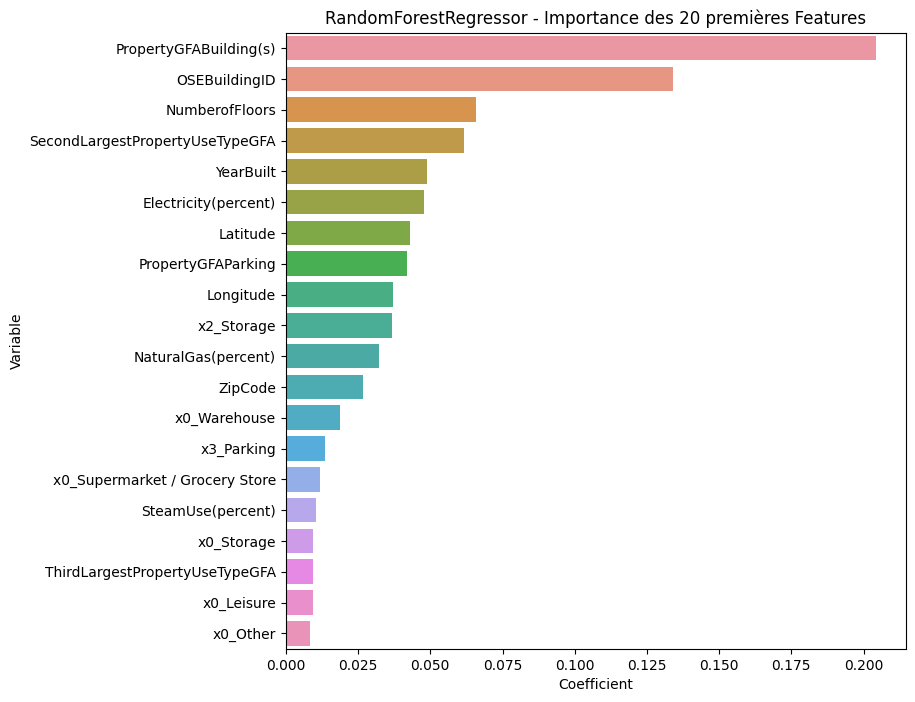

In [48]:
plt.figure(figsize=(8,8))
plt.title('RandomForestRegressor - Importance des 20 premières Features')
sns.barplot(y = liste_coefs_rer['Variable'].head(20),
            x = liste_coefs_rer['Coefficient'].head(20))
plt.show()

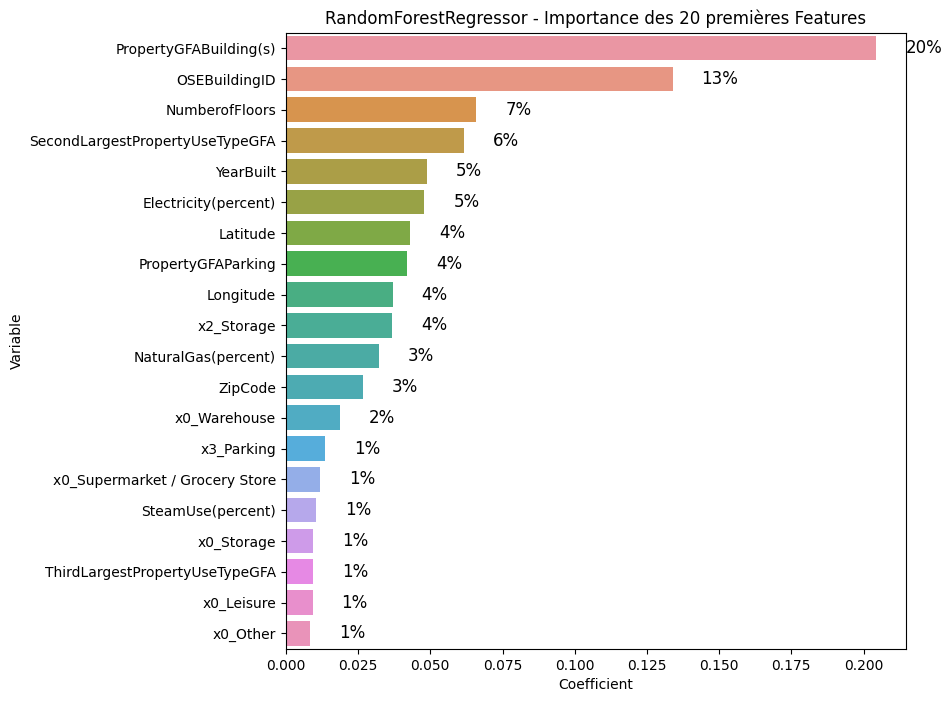

In [49]:
plt.figure(figsize=(8,8))
plt.title('RandomForestRegressor - Importance des 20 premières Features')

# Créer le graphique à barres
barplot = sns.barplot(y = liste_coefs_rer['Variable'].head(20),
            x = liste_coefs_rer['Coefficient'].head(20))

# Parcourir toutes les barres et ajouter les pourcentages correspondants
for p in barplot.patches:
    width = p.get_width()    # Récupérer la largeur de la barre
    percentage = width * 100    # Calculer le pourcentage
    plt.text(width + 0.01,    # Ajouter un petit décalage
             p.get_y() + p.get_height() / 2,    # Récupérer la hauteur de la barre
             f'{percentage:.0f}%',    # Afficher le pourcentage sans décimale
             ha='left',    # Aligner à gauche
             va='center',    # Centrer verticalement
             fontsize=12)    # Taille de la police


plt.show()


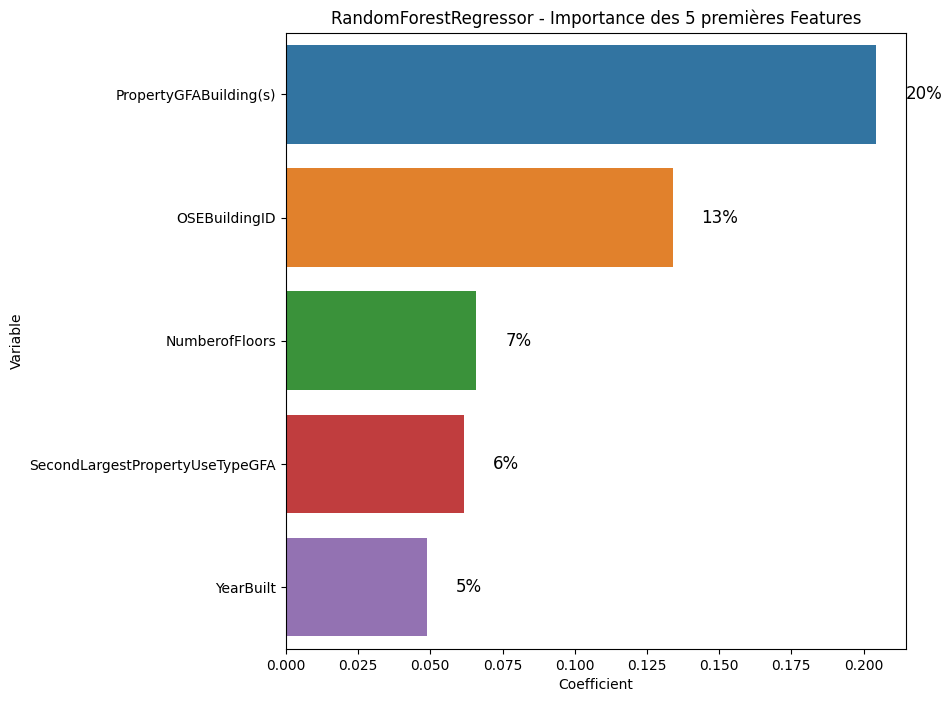

In [50]:
plt.figure(figsize=(8, 8))
plt.title('RandomForestRegressor - Importance des 5 premières Features')

# Obtenir les 5 premières colonnes les plus importantes
top_5_features = liste_coefs_rer['Variable'].head(5)

# Créer le graphique à barres
barplot = sns.barplot(y=top_5_features, x=liste_coefs_rer['Coefficient'].head(5))

# Parcourir toutes les barres et ajouter les pourcentages correspondants
for p in barplot.patches:
    width = p.get_width()    # Récupérer la largeur de la barre
    percentage = width * 100    # Calculer le pourcentage
    plt.text(width + 0.01,    # Ajouter un petit décalage
             p.get_y() + p.get_height() / 2,    # Récupérer la hauteur de la barre
             f'{percentage:.0f}%',    # Afficher le pourcentage sans décimale
             ha='left',    # Aligner à gauche
             va='center',    # Centrer verticalement
             fontsize=12)    # Taille de la police

plt.show()


## Support Vector Regression 

In [51]:
from sklearn.svm import SVR

parameters = {'gamma' : [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1], #kernel coefficient [ici kernel = Radial Basis Function]
              'epsilon' : [0.001, 0.01, 0.1, 1], #erreur tolérée par l'algorithme
              'C' : [0.001, 0.01, 0.1, 1, 10]} #parametre de régularisation

svm = GridSearchCV(estimator = SVR(), 
                      param_grid = parameters,
                      #scoring = 'neg_mean_squared_error',
                      cv=5,
                   verbose=2
                     )

svm.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-06; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.00

[CV] END .................C=0.001, epsilon=0.1, gamma=0.0001; total time=   0.0s
[CV] END .................C=0.001, epsilon=0.1, gamma=0.0001; total time=   0.0s
[CV] END .................C=0.001, epsilon=0.1, gamma=0.0001; total time=   0.0s
[CV] END .................C=0.001, epsilon=0.1, gamma=0.0001; total time=   0.0s
[CV] END ..................C=0.001, epsilon=0.1, gamma=0.001; total time=   0.0s
[CV] END ..................C=0.001, epsilon=0.1, gamma=0.001; total time=   0.0s
[CV] END ..................C=0.001, epsilon=0.1, gamma=0.001; total time=   0.0s
[CV] END ..................C=0.001, epsilon=0.1, gamma=0.001; total time=   0.0s
[CV] END ..................C=0.001, epsilon=0.1, gamma=0.001; total time=   0.0s
[CV] END ...................C=0.001, epsilon=0.1, gamma=0.01; total time=   0.0s
[CV] END ...................C=0.001, epsilon=0.1, gamma=0.01; total time=   0.0s
[CV] END ...................C=0.001, epsilon=0.1, gamma=0.01; total time=   0.0s
[CV] END ...................

[CV] END ..................C=0.01, epsilon=0.01, gamma=1e-08; total time=   0.0s
[CV] END ..................C=0.01, epsilon=0.01, gamma=1e-07; total time=   0.0s
[CV] END ..................C=0.01, epsilon=0.01, gamma=1e-07; total time=   0.0s
[CV] END ..................C=0.01, epsilon=0.01, gamma=1e-07; total time=   0.0s
[CV] END ..................C=0.01, epsilon=0.01, gamma=1e-07; total time=   0.0s
[CV] END ..................C=0.01, epsilon=0.01, gamma=1e-07; total time=   0.0s
[CV] END ..................C=0.01, epsilon=0.01, gamma=1e-06; total time=   0.0s
[CV] END ..................C=0.01, epsilon=0.01, gamma=1e-06; total time=   0.0s
[CV] END ..................C=0.01, epsilon=0.01, gamma=1e-06; total time=   0.0s
[CV] END ..................C=0.01, epsilon=0.01, gamma=1e-06; total time=   0.0s
[CV] END ..................C=0.01, epsilon=0.01, gamma=1e-06; total time=   0.0s
[CV] END ..................C=0.01, epsilon=0.01, gamma=1e-05; total time=   0.0s
[CV] END ..................C

[CV] END ......................C=0.01, epsilon=1, gamma=0.01; total time=   0.0s
[CV] END ......................C=0.01, epsilon=1, gamma=0.01; total time=   0.0s
[CV] END ......................C=0.01, epsilon=1, gamma=0.01; total time=   0.0s
[CV] END ......................C=0.01, epsilon=1, gamma=0.01; total time=   0.0s
[CV] END ......................C=0.01, epsilon=1, gamma=0.01; total time=   0.0s
[CV] END .......................C=0.01, epsilon=1, gamma=0.1; total time=   0.0s
[CV] END .......................C=0.01, epsilon=1, gamma=0.1; total time=   0.0s
[CV] END .......................C=0.01, epsilon=1, gamma=0.1; total time=   0.0s
[CV] END .......................C=0.01, epsilon=1, gamma=0.1; total time=   0.0s
[CV] END .......................C=0.01, epsilon=1, gamma=0.1; total time=   0.0s
[CV] END ..................C=0.1, epsilon=0.001, gamma=1e-08; total time=   0.0s
[CV] END ..................C=0.1, epsilon=0.001, gamma=1e-08; total time=   0.0s
[CV] END ..................C

[CV] END ....................C=0.1, epsilon=0.1, gamma=1e-06; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.1, gamma=1e-06; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.1, gamma=1e-05; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.1, gamma=1e-05; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.1, gamma=1e-05; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.1, gamma=1e-05; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.1, gamma=1e-05; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.1, gamma=0.0001; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.1, gamma=0.0001; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.1, gamma=0.0001; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.1, gamma=0.0001; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.1, gamma=0.0001; total time=   0.0s
[CV] END ...................

[CV] END ......................C=1, epsilon=0.001, gamma=0.1; total time=   0.0s
[CV] END ......................C=1, epsilon=0.001, gamma=0.1; total time=   0.0s
[CV] END ......................C=1, epsilon=0.001, gamma=0.1; total time=   0.0s
[CV] END ......................C=1, epsilon=0.001, gamma=0.1; total time=   0.0s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-08; total time=   0.0s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-08; total time=   0.0s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-08; total time=   0.0s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-08; total time=   0.0s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-08; total time=   0.0s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.0s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.0s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.0s
[CV] END ...................

[CV] END .......................C=1, epsilon=1, gamma=0.0001; total time=   0.0s
[CV] END .......................C=1, epsilon=1, gamma=0.0001; total time=   0.0s
[CV] END .......................C=1, epsilon=1, gamma=0.0001; total time=   0.0s
[CV] END .......................C=1, epsilon=1, gamma=0.0001; total time=   0.0s
[CV] END ........................C=1, epsilon=1, gamma=0.001; total time=   0.0s
[CV] END ........................C=1, epsilon=1, gamma=0.001; total time=   0.0s
[CV] END ........................C=1, epsilon=1, gamma=0.001; total time=   0.0s
[CV] END ........................C=1, epsilon=1, gamma=0.001; total time=   0.0s
[CV] END ........................C=1, epsilon=1, gamma=0.001; total time=   0.0s
[CV] END .........................C=1, epsilon=1, gamma=0.01; total time=   0.0s
[CV] END .........................C=1, epsilon=1, gamma=0.01; total time=   0.0s
[CV] END .........................C=1, epsilon=1, gamma=0.01; total time=   0.0s
[CV] END ...................

[CV] END .....................C=10, epsilon=0.1, gamma=1e-08; total time=   0.0s
[CV] END .....................C=10, epsilon=0.1, gamma=1e-08; total time=   0.0s
[CV] END .....................C=10, epsilon=0.1, gamma=1e-07; total time=   0.0s
[CV] END .....................C=10, epsilon=0.1, gamma=1e-07; total time=   0.0s
[CV] END .....................C=10, epsilon=0.1, gamma=1e-07; total time=   0.0s
[CV] END .....................C=10, epsilon=0.1, gamma=1e-07; total time=   0.0s
[CV] END .....................C=10, epsilon=0.1, gamma=1e-07; total time=   0.0s
[CV] END .....................C=10, epsilon=0.1, gamma=1e-06; total time=   0.0s
[CV] END .....................C=10, epsilon=0.1, gamma=1e-06; total time=   0.0s
[CV] END .....................C=10, epsilon=0.1, gamma=1e-06; total time=   0.0s
[CV] END .....................C=10, epsilon=0.1, gamma=1e-06; total time=   0.0s
[CV] END .....................C=10, epsilon=0.1, gamma=1e-06; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'epsilon': [0.001, 0.01, 0.1, 1],
                         'gamma': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1]},
             verbose=2)

In [52]:
svm.best_params_

{'C': 10, 'epsilon': 0.1, 'gamma': 0.01}

{'C': 10, 'epsilon': 0.1, 'gamma': 0.01}

In [53]:
results = results.append(pd.DataFrame({
    'Modèle' : ['Support Vector Machine'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(svm.predict(X_test), y_test))]}),
              ignore_index=True)

In [54]:
results

,Modèle,Score_RMSE
0,Elasticnet Regression,0.933519
1,Random Forest Regressor,0.912786
2,Support Vector Machine,0.842154


In [55]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
 # Calcul du RMSE
y_pred_test = svm.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE(log):", rmse)

# Calcul du MAP
map_score = mean_absolute_percentage_error(y_test, y_pred_test)
print("MAPE(log):", map_score)

# Calcul du R²
r2 = r2_score(y_test, y_pred_test)
print("R²(log):", r2)

# Calcul de l'erreur quadratique moyenne en pourcentage (MPSE)
mpse = math.sqrt(mean_squared_error(y_test, y_pred_test)) / y_test.mean() * 100
print("MPSE :", mpse)

# Calcul du taux de prédictions entre 90% et 110% de la valeur réelle
predictions_within_range = ((y_pred_test >= 0.9 * y_test) & (y_pred_test <= 1.1 * y_test)).mean() * 100
print("Taux de prédictions entre 90% et 110% :", predictions_within_range)



RMSE(log): 0.8421538606036331
MAPE(log): 0.031286618906697705
R²(log): 0.6952177215318001
MPSE : 3.939811259805338
Taux de prédictions entre 90% et 110% : 98.40637450199203


In [56]:
# Calcul du RMSE
y_pred_test = svm.predict(X_test)
rmse = math.sqrt(mean_squared_error(np.exp2(y_test), np.exp2(y_pred_test)))
print("RMSE (exp):", rmse)

# Calcul du MAP
map_score = mean_absolute_percentage_error(np.exp2(y_test), np.exp2(y_pred_test))
print("MAPE (exp) :", map_score)

# Calcul du R²
r2 = r2_score(np.exp2(y_test), np.exp2(y_pred_test))
print("R² (exp) :", r2)

# Calcul de l'erreur quadratique moyenne en pourcentage (MPSE)
mpse = math.sqrt(mean_squared_error(np.exp2(y_test), np.exp2(y_pred_test))) / np.exp2(y_test.mean()) * 100
print("MPSE :", mpse)

# Calcul du taux de prédictions entre 90% et 110% de la valeur réelle
predictions_within_range = ((np.exp2(y_pred_test) >= 0.9 * np.exp2(y_test)) & (np.exp2(y_pred_test) <= 1.1 * np.exp2(y_test))).mean() * 100 
print("Taux de prédictions entre 90% et 110% :", predictions_within_range)


RMSE (exp): 2935124.3986867806
MAPE (exp) : 0.504507104358554
R² (exp) : 0.6837999300303104
MPSE : 107.88563552395249
Taux de prédictions entre 90% et 110% : 14.342629482071715


## XG Boost 

In [57]:
from xgboost import XGBRegressor

In [58]:
parameters = {
    'n_estimators' : [100,500,1000,2000]
}
xgb_grid = GridSearchCV(XGBRegressor(n_jobs=-1),
                        param_grid = parameters,
                      #scoring = 'neg_mean_squared_error',
                        cv = 5,
                        verbose=5)
xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ..................n_estimators=100;, score=0.602 total time=   0.9s
[CV 2/5] END ..................n_estimators=100;, score=0.611 total time=   0.1s
[CV 3/5] END ..................n_estimators=100;, score=0.633 total time=   0.1s
[CV 4/5] END ..................n_estimators=100;, score=0.589 total time=   0.1s
[CV 5/5] END ..................n_estimators=100;, score=0.613 total time=   0.1s
[CV 1/5] END ..................n_estimators=500;, score=0.602 total time=   0.8s
[CV 2/5] END ..................n_estimators=500;, score=0.611 total time=   0.8s
[CV 3/5] END ..................n_estimators=500;, score=0.632 total time=   0.8s
[CV 4/5] END ..................n_estimators=500;, score=0.584 total time=   0.8s
[CV 5/5] END ..................n_estimators=500;, score=0.609 total time=   0.8s
[CV 1/5] END .................n_estimators=1000;, score=0.602 total time=   1.3s
[CV 2/5] END .................n_estimators=1000;,

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
 

In [59]:
xgb_grid.best_params_

{'n_estimators': 100}

In [60]:
xgb_grid.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [61]:
xgb_grid.best_estimator_.feature_importances_ 

array([3.26125813e-03, 3.24383238e-03, 4.93881665e-03, 4.40042233e-03,
       6.20111171e-03, 6.17023557e-03, 5.84508898e-03, 2.42682137e-02,
       4.93832193e-02, 9.50653292e-03, 1.27539039e-02, 5.90432482e-03,
       1.01127280e-02, 4.52061882e-03, 9.88394674e-03, 4.22021411e-02,
       6.52984425e-04, 2.81687155e-02, 3.99222551e-03, 2.06414256e-02,
       1.24458475e-02, 5.84338512e-03, 1.11394748e-02, 5.71997203e-02,
       6.66137226e-03, 8.35830811e-03, 1.28559973e-02, 0.00000000e+00,
       1.52872931e-02, 1.32345548e-02, 2.88612815e-03, 4.30008629e-03,
       5.30109415e-03, 1.79094784e-02, 5.46070165e-04, 1.29885580e-02,
       3.84409376e-03, 1.01463636e-02, 8.86640605e-03, 1.96235068e-02,
       5.72486706e-02, 1.23088034e-02, 7.64892064e-03, 2.39367553e-04,
       1.47257186e-02, 0.00000000e+00, 0.00000000e+00, 2.56680232e-03,
       1.05754370e-02, 2.61617243e-01, 8.20930873e-04, 7.63896341e-03,
       3.91693134e-03, 1.03611518e-02, 8.94759875e-03, 1.02323340e-02,
      

In [62]:
import math
results = results.append(pd.DataFrame({
    'Modèle' : ['XGBoost'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(xgb_grid.predict(X_test), y_test))]}),
              ignore_index=True)

In [63]:
results

,Modèle,Score_RMSE
0,Elasticnet Regression,0.933519
1,Random Forest Regressor,0.912786
2,Support Vector Machine,0.842154
3,XGBoost,0.869454


In [64]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
 # Calcul du RMSE
y_pred_test = xgb_grid.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE(log):", rmse)

# Calcul du MAPE
map_score = mean_absolute_percentage_error(y_test, y_pred_test)
print("MAPE(log):", map_score)

# Calcul du R²
r2 = r2_score(y_test, y_pred_test)
print("R²(log):", r2)

# Calcul de l'erreur quadratique moyenne en pourcentage (MPSE)
mpse = math.sqrt(mean_squared_error(y_test, y_pred_test)) / y_test.mean() * 100
print("MPSE :", mpse)

# Calcul du taux de prédictions entre 90% et 110% de la valeur réelle
predictions_within_range = ((y_pred_test >= 0.9 * y_test) & (y_pred_test <= 1.1 * y_test)).mean() * 100
print("Taux de prédictions entre 90% et 110% :", predictions_within_range) 

RMSE(log): 0.8694540725552568
MAPE(log): 0.032630674110763744
R²(log): 0.6751371008192529
MPSE : 4.067528637203555
Taux de prédictions entre 90% et 110% : 98.40637450199203


In [65]:
# Calcul du RMSE
y_pred_test = xgb_grid.predict(X_test)
rmse = math.sqrt(mean_squared_error(np.exp2(y_test), np.exp2(y_pred_test)))
print("RMSE (exp):", rmse)

# Calcul du MAP
map_score = mean_absolute_percentage_error(np.exp2(y_test), np.exp2(y_pred_test))
print("MAPE (exp) :", map_score)

# Calcul du R²
r2 = r2_score(np.exp2(y_test), np.exp2(y_pred_test))
print("R² (exp) :", r2)

# Calcul de l'erreur quadratique moyenne en pourcentage (MPSE)
mpse = math.sqrt(mean_squared_error(np.exp2(y_test), np.exp2(y_pred_test))) / np.exp2(y_test.mean()) * 100
print("MPSE :", mpse)

# Calcul du taux de prédictions entre 90% et 110% de la valeur réelle
predictions_within_range = ((np.exp2(y_pred_test) >= 0.9 * np.exp2(y_test)) & (np.exp2(y_pred_test) <= 1.1 * np.exp2(y_test))).mean() * 100 
print("Taux de prédictions entre 90% et 110% :", predictions_within_range)

RMSE (exp): 3059926.617505617
MAPE (exp) : 0.5188594190432118
R² (exp) : 0.6563384382017174
MPSE : 112.47295955631505
Taux de prédictions entre 90% et 110% : 15.139442231075698


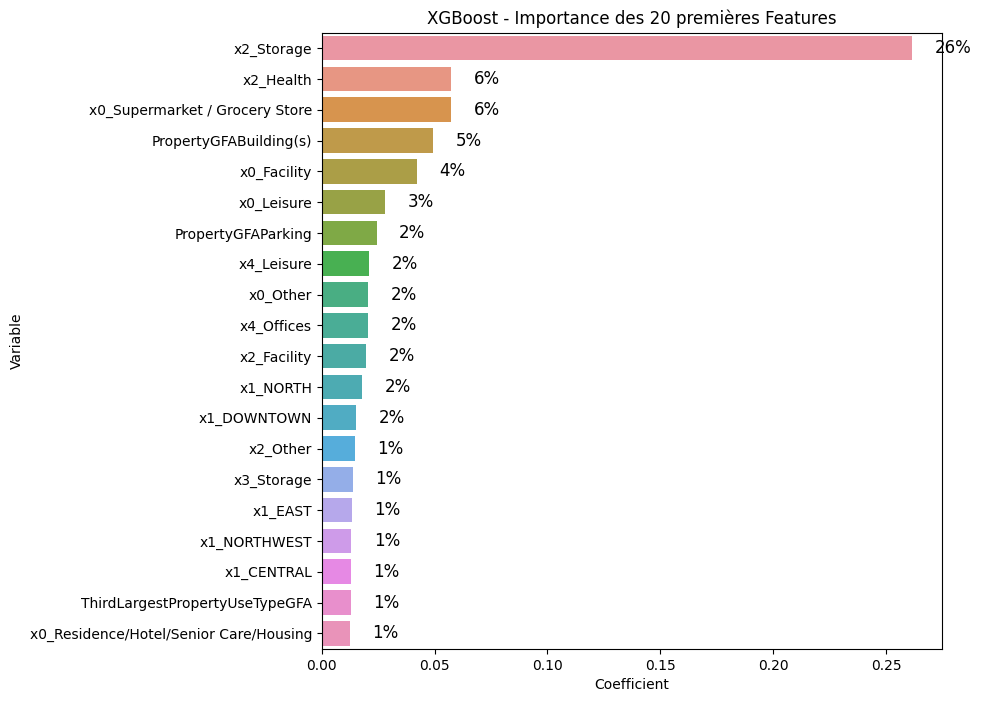

In [66]:
coefficients = abs(xgb_grid.best_estimator_.feature_importances_)
liste_coefs_svr = pd.concat((pd.DataFrame(X.columns, columns=['Variable']),
                            pd.DataFrame(coefficients, columns=['Coefficient'])), axis=1).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8,8))
plt.title('XGBoost - Importance des 20 premières Features')

# Créer le graphique à barres
barplot = sns.barplot(y = liste_coefs_svr['Variable'].head(20),
            x = liste_coefs_svr['Coefficient'].head(20))

# Parcourir toutes les barres et ajouter les pourcentages correspondants
for p in barplot.patches:
    width = p.get_width()    # Récupérer la largeur de la barre
    percentage = width * 100    # Calculer le pourcentage
    plt.text(width + 0.01,    # Ajouter un petit décalage
             p.get_y() + p.get_height() / 2,    # Récupérer la hauteur de la barre
             f'{percentage:.0f}%',    # Afficher le pourcentage sans décimale
             ha='left',    # Aligner à gauche
             va='center',    # Centrer verticalement
             fontsize=12)    # Taille de la police


plt.show()

## Export des modèles pour réutilisation ultérieure

In [121]:
rfr_search

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'n_estimators': [10, 50, 100, 300, 500]},
             verbose=2)

In [122]:
dict_modeles = {
    'Elastic Net': elastic_grid.best_estimator_,
    'Random Forest Regressor' : rfr_search.best_estimator_,
    'SVM' : svm.best_estimator_,
    'XGBoost' : xgb_grid.best_estimator_,
}

In [123]:
import pickle
for nom, model in dict_modeles.items():
    filename = 'models/' + nom + '.obj' 
    with  open(filename, 'wb') as filehandler :
        pickle.dump(model, filehandler)

In [124]:
#Export du one hot encoder

with  open('models/onehotencoder.obj', 'wb') as filehandler :
    pickle.dump(ohe, filehandler)
    
#export du standardscaler
with  open('models/standardscaler.obj', 'wb') as filehandler :
    pickle.dump(ss, filehandler)

## Chargement des modèles

In [125]:
dict_modeles_new = dict_modeles

In [126]:
dict_modeles_new = {}

In [127]:
import glob
import pickle
for filename in glob.glob('models/*'):
    if filename not in ['models\onehotencoder.obj', 'models\standardscaler.obj']:
        with open(filename, 'rb') as filehandler:
            print(filename)
            dict_modeles_new[str(filename)] = pickle.load(filehandler)

models\Elastic Net.obj
models\Random Forest Regressor.obj
models\rfr_emissions.obj
models\SVM.obj
models\XGBoost.obj


In [128]:
dict_modeles_new['models\XGBoost.obj'].feature_importances_

array([3.26125813e-03, 3.24383238e-03, 4.93881665e-03, 4.40042233e-03,
       6.20111171e-03, 6.17023557e-03, 5.84508898e-03, 2.42682137e-02,
       4.93832193e-02, 9.50653292e-03, 1.27539039e-02, 5.90432482e-03,
       1.01127280e-02, 4.52061882e-03, 9.88394674e-03, 4.22021411e-02,
       6.52984425e-04, 2.81687155e-02, 3.99222551e-03, 2.06414256e-02,
       1.24458475e-02, 5.84338512e-03, 1.11394748e-02, 5.71997203e-02,
       6.66137226e-03, 8.35830811e-03, 1.28559973e-02, 0.00000000e+00,
       1.52872931e-02, 1.32345548e-02, 2.88612815e-03, 4.30008629e-03,
       5.30109415e-03, 1.79094784e-02, 5.46070165e-04, 1.29885580e-02,
       3.84409376e-03, 1.01463636e-02, 8.86640605e-03, 1.96235068e-02,
       5.72486706e-02, 1.23088034e-02, 7.64892064e-03, 2.39367553e-04,
       1.47257186e-02, 0.00000000e+00, 0.00000000e+00, 2.56680232e-03,
       1.05754370e-02, 2.61617243e-01, 8.20930873e-04, 7.63896341e-03,
       3.91693134e-03, 1.03611518e-02, 8.94759875e-03, 1.02323340e-02,
      

## Comparaison des modèles

Comparons les modèles sur le critère de la RMSE divisée par la moyenne de la valeur à prédire

In [129]:
import pandas as pd
import math
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
import matplotlib.pyplot as plt

def compare_metrics_table(y_true, y_pred_rf, y_pred_svm, y_pred_xgb):
    # Calcul des métriques pour chaque modèle
    metrics = {
        'Modèle (Log)': ['RandomForest', 'SVM', 'XGBoost'],
        'R²': [r2_score(y_true, y_pred_rf), r2_score(y_true, y_pred_svm), r2_score(y_true, y_pred_xgb)],
        'MAPE': [mean_absolute_percentage_error(y_true, y_pred_rf), mean_absolute_percentage_error(y_true, y_pred_svm), mean_absolute_percentage_error(y_true, y_pred_xgb)],
        'RMSE': [math.sqrt(mean_squared_error(y_true, y_pred_rf)), math.sqrt(mean_squared_error(y_true, y_pred_svm)), math.sqrt(mean_squared_error(y_true, y_pred_xgb))],
        'Prédiction dans la plage': [((y_pred_rf >= 0.9 * y_true) & (y_pred_rf <= 1.1 * y_true)).mean() * 100, ((y_pred_svm >= 0.9 * y_true) & (y_pred_svm <= 1.1 * y_true)).mean() * 100, ((y_pred_xgb >= 0.9 * y_true) & (y_pred_xgb <= 1.1 * y_true)).mean() * 100]
    }

    # Création du DataFrame pour stocker les métriques
    df = pd.DataFrame(metrics)

    # Création du styler pour ajouter du style et des bordures au tableau
    styler = df.style\
        .set_table_styles([{'selector': 'th', 'props': [('border', '1px solid black')]},
                           {'selector': 'td', 'props': [('border', '1px solid black')]}])\
        .set_properties(**{'text-align': 'center'})

    # Affichage du tableau avec style
    display(styler)

y_pred_rf = rfr_search.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_xgb = xgb_grid.predict(X_test)
compare_metrics_table(y_test, y_pred_rf, y_pred_svm, y_pred_xgb)


,Modèle (Log),R²,MAPE,RMSE,Prédiction dans la plage
0,RandomForest,0.641949,0.033249,0.912786,97.211155
1,SVM,0.695218,0.031287,0.842154,98.406375
2,XGBoost,0.675137,0.032631,0.869454,98.406375


In [130]:
import pandas as pd
import math
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
import matplotlib.pyplot as plt

def compare_metrics_table_exp(y_true, y_pred_rf, y_pred_svm, y_pred_xgb):
    # Calcul des métriques pour chaque modèle
    metrics = {
        'Modèle (Réel)': ['RandomForest', 'SVM', 'XGBoost'],
        'R²': [r2_score(y_true, y_pred_rf), r2_score(y_true, y_pred_svm), r2_score(y_true, y_pred_xgb)],
        'MAPE': [mean_absolute_percentage_error(y_true, y_pred_rf), mean_absolute_percentage_error(y_true, y_pred_svm), mean_absolute_percentage_error(y_true, y_pred_xgb)],
        'RMSE': [math.sqrt(mean_squared_error(y_true, y_pred_rf)), math.sqrt(mean_squared_error(y_true, y_pred_svm)), math.sqrt(mean_squared_error(y_true, y_pred_xgb))],
        'Prédiction dans la plage': [((y_pred_rf >= 0.9 * y_true) & (y_pred_rf <= 1.1 * y_true)).mean() * 100, ((y_pred_svm >= 0.9 * y_true) & (y_pred_svm <= 1.1 * y_true)).mean() * 100, ((y_pred_xgb >= 0.9 * y_true) & (y_pred_xgb <= 1.1 * y_true)).mean() * 100]
    }

    # Création du DataFrame pour stocker les métriques
    df = pd.DataFrame(metrics)

    # Création du styler pour ajouter du style et des bordures au tableau
    styler = df.style\
        .set_table_styles([{'selector': 'th', 'props': [('border', '1px solid black')]},
                           {'selector': 'td', 'props': [('border', '1px solid black')]}])\
        .set_properties(**{'text-align': 'center'})

    # Affichage du tableau avec style
    display(styler)

y_pred_rf = (rfr_search.predict(X_test))
y_pred_svm = (svm.predict(X_test))
y_pred_xgb = (xgb_grid.predict(X_test))
compare_metrics_table_exp(np.exp2(y_test), np.exp2(y_pred_rf), np.exp2(y_pred_svm), np.exp2(y_pred_xgb))


# # Calcul du RMSE
# y_pred_test = xgb_grid.predict(X_test)
# rmse = math.sqrt(mean_squared_error(np.exp2(y_test), np.exp2(y_pred_test)))
# print("RMSE (exp):", rmse)

# # Calcul du MAP
# map_score = mean_absolute_percentage_error(np.exp2(y_test), np.exp2(y_pred_test))
# print("MAPE (exp) :", map_score)

# # Calcul du R²
# r2 = r2_score(np.exp2(y_test), np.exp2(y_pred_test))
# print("R² (exp) :", r2)

# # Calcul de l'erreur quadratique moyenne en pourcentage (MPSE)
# mpse = math.sqrt(mean_squared_error(np.exp2(y_test), np.exp2(y_pred_test))) / np.exp2(y_test.mean()) * 100
# print("MPSE :", mpse)

# # Calcul du taux de prédictions entre 90% et 110% de la valeur réelle
# predictions_within_range = ((np.exp2(y_pred_test) >= 0.9 * np.exp2(y_test)) & (np.exp2(y_pred_test) <= 1.1 * np.exp2(y_test))).mean() * 100 
# print("Taux de prédictions entre 90% et 110% :", predictions_within_range)

,Modèle (Réel),R²,MAPE,RMSE,Prédiction dans la plage
0,RandomForest,0.442454,0.537157,3897497.059438,15.537849
1,SVM,0.683800,0.504507,2935124.398687,14.342629
2,XGBoost,0.656338,0.518859,3059926.617506,15.139442


In [131]:
results['RMSE_%'] = results['Score_RMSE'].divide(y_test.mean())

In [132]:
results 

,Modèle,Score_RMSE,RMSE_%
0,Elasticnet Regression,0.933519,0.043672
1,Random Forest Regressor,0.912786,0.042702
2,Support Vector Machine,0.842154,0.039398
3,XGBoost,0.869454,0.040675


In [133]:
def compare_metrics_1_bar(y_true, y_pred_rf, y_pred_svm, y_pred_xgb):
    # Calcul des métriques pour chaque modèle
    metrics = {
        'Modèle': ['RandomForest', 'SVM', 'XGBoost'],
        'R²': [r2_score(y_true, y_pred_rf), r2_score(y_true, y_pred_svm), r2_score(y_true, y_pred_xgb)],
        'MAPE': [mean_absolute_percentage_error(y_true, y_pred_rf), mean_absolute_percentage_error(y_true, y_pred_svm), mean_absolute_percentage_error(y_true, y_pred_xgb)],
        'RMSE': [math.sqrt(mean_squared_error(y_true, y_pred_rf)), math.sqrt(mean_squared_error(y_true, y_pred_svm)), math.sqrt(mean_squared_error(y_true, y_pred_xgb))]
    }

    # Création du DataFrame pour stocker les métriques
    df = pd.DataFrame(metrics)

    # Affichage du tableau
    print(df)

    # Création du graphique
    plt.figure(figsize=(10, 6))

    # Barres pour les valeurs de R²
    plt.bar(df['Modèle'], df['R²'], label='R²')

    # Barres pour les valeurs de MAPE
    plt.bar(df['Modèle'], df['MAPE'], bottom=df['R²'], label='MAPE')

    # Barres pour les valeurs de RMSE
    plt.bar(df['Modèle'], df['RMSE'], bottom=df['R²'] + df['MAPE'], label='RMSE')

    # Affichage des valeurs pour chaque métrique avec des barres horizontales
    for i in range(len(df)):
        plt.text(i, df['R²'][i] / 2, f"{df['R²'][i]:.3f}", ha='center', va='center')
        plt.text(i, df['R²'][i] + df['MAPE'][i] / 2, f"{df['MAPE'][i]:.2f}%", ha='center', va='center')
        plt.text(i, df['R²'][i] + df['MAPE'][i] + df['RMSE'][i] / 2, f"{df['RMSE'][i]:.3f}", ha='center', va='center')

    plt.xlabel('Modèle')
    plt.ylabel('Score')
    plt.title('Comparaison des métriques entre les modèles')
    plt.legend()
    plt.show()


         Modèle        R²      MAPE      RMSE
0  RandomForest  0.641949  0.033249  0.912786
1  SVM           0.695218  0.031287  0.842154
2  XGBoost       0.675137  0.032631  0.869454


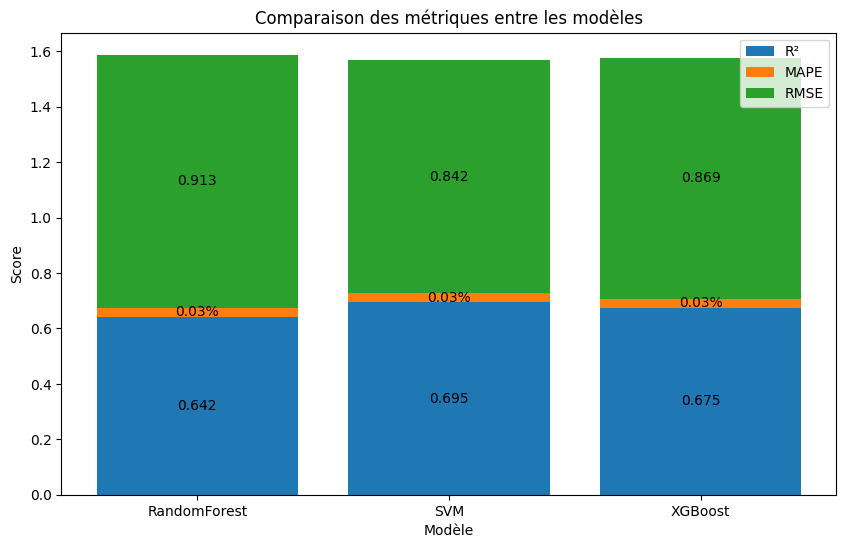

In [134]:
y_pred_test_rf = rfr_search.predict(X_test)
y_pred_test_svm = svm.predict(X_test)
y_pred_test_xgb = xgb_grid.predict(X_test)
# Exemple d'utilisation de la fonction
compare_metrics_1_bar(y_test, y_pred_test_rf, y_pred_test_svm, y_pred_test_xgb)


In [135]:
# y_pred_test_rf = rfr_search.predict(X_test)
# y_pred_test_svm = svm.predict(X_test)
# y_pred_test_xgb = xgb_grid.predict(X_test)
# # Exemple d'utilisation de la fonction
# compare_metrics_1_bar(np.exp2(y_test), np.exp2(y_pred_test_rf), np.exp2(y_pred_test_svm), np.exp2(y_pred_test_xgb))


In [136]:
def compare_metrics(y_true, y_pred_rf, y_pred_svm, y_pred_xgb):
    # Calcul des métriques pour chaque modèle
    rmse_rf = math.sqrt(mean_squared_error(y_true, y_pred_rf))
    rmse_svm = math.sqrt(mean_squared_error(y_true, y_pred_svm))
    rmse_xgb = math.sqrt(mean_squared_error(y_true, y_pred_xgb))
    
    r2_rf = r2_score(y_true, y_pred_rf)
    r2_svm = r2_score(y_true, y_pred_svm)
    r2_xgb = r2_score(y_true, y_pred_xgb)
    
    mape_rf = mean_absolute_percentage_error(y_true, y_pred_rf)
    mape_svm = mean_absolute_percentage_error(y_true, y_pred_svm)
    mape_xgb = mean_absolute_percentage_error(y_true, y_pred_xgb)
    
    # Noms des modèles
    models = ['Random Forest', 'SVM', 'XGBoost']
    
    # Métriques
    rmse_scores = [rmse_rf, rmse_svm, rmse_xgb]
    r2_scores = [r2_rf, r2_svm, r2_xgb]
    mape_scores = [mape_rf, mape_svm, mape_xgb]
    
    # Création du graphique
    fig, ax = plt.subplots(figsize=(10, 6))
    x = np.arange(len(models))
    width = 0.25
    
    # Barres pour le RMSE
    ax.bar(x - width, rmse_scores, width, label='RMSE')
    # Barres pour le R²
    ax.bar(x, r2_scores, width, label='R²')
    # Barres pour le MAPE
    ax.bar(x + width, mape_scores, width, label='MAPE')
    
    # Configurations de l'axe des x
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.set_xlabel('Modèles')
    
    # Légende et titre du graphique
    ax.legend()
    ax.set_title('Comparaison des métriques')
    
    # Affichage du graphique
    plt.show()


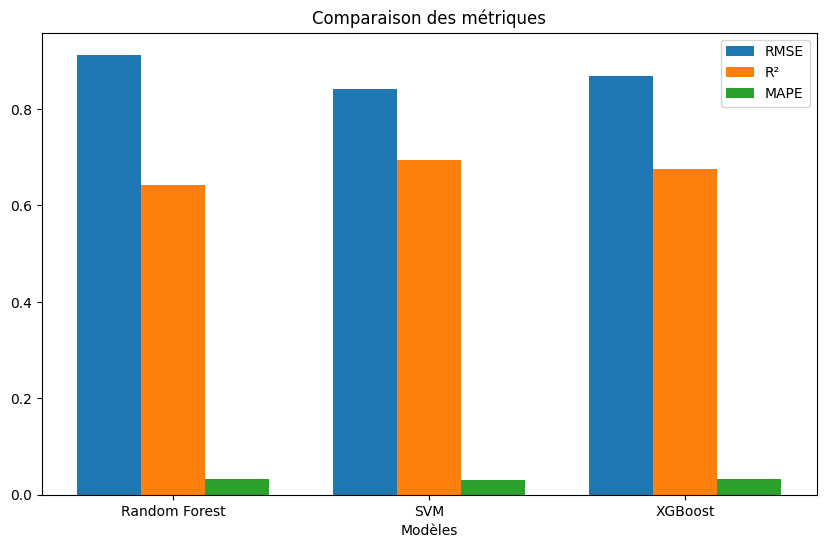

In [137]:
y_pred_test_rf = rfr_search.predict(X_test)
y_pred_test_svm = svm.predict(X_test)
y_pred_test_xgb = xgb_grid.predict(X_test)
# Exemple d'utilisation de la fonction
compare_metrics(y_test, y_pred_test_rf, y_pred_test_svm, y_pred_test_xgb)


La RMSE relative des meilleurs modèles est de 3,0 % (racine de l'erreur quadratique moyenne ramenée à la valeur à prédire), c'est une performance remarquable.

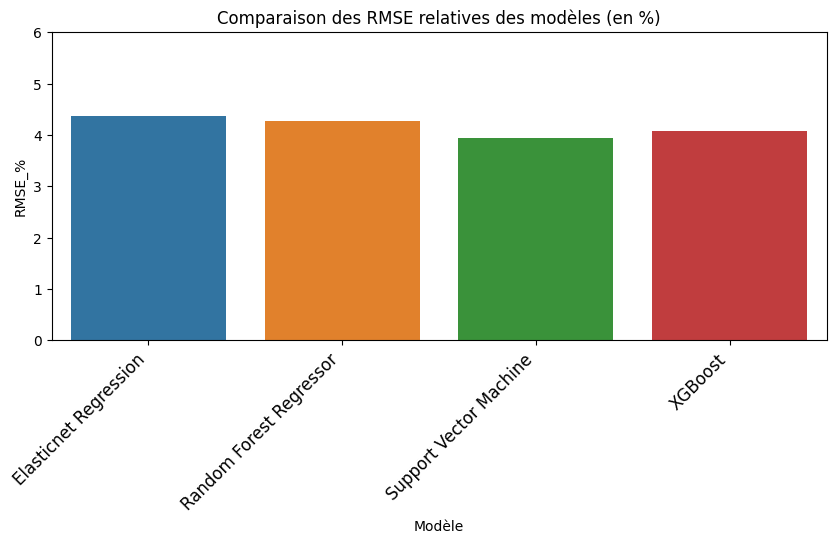

In [138]:
plt.figure(figsize=(10,4))
plt.title('Comparaison des RMSE relatives des modèles (en %)')
chart = sns.barplot(x = results['Modèle'],
           y = results['RMSE_%']*100)
chart.set_xticklabels(labels = results['Modèle'], 
                      rotation=45,
                     horizontalalignment='right',
                     size=12,
                     )
ax = plt.gca()
ax.set_ylim([0, 6])
plt.show()

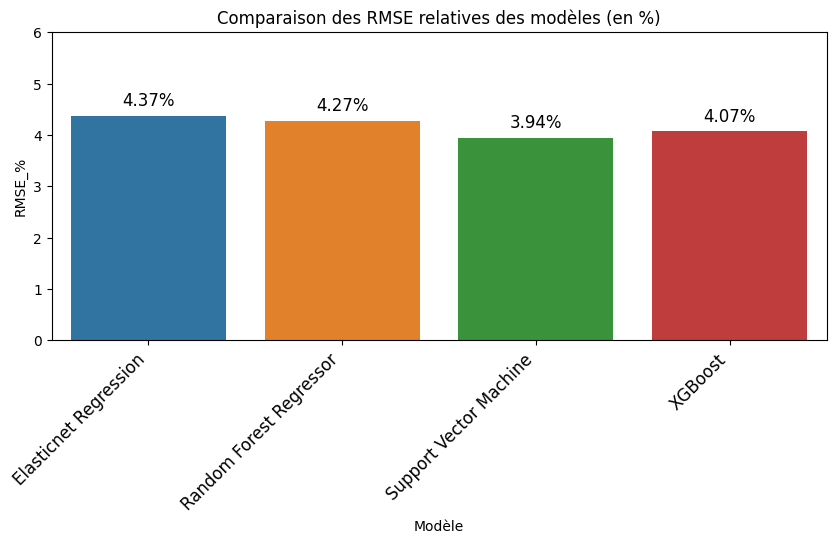

In [139]:
plt.figure(figsize=(10, 4))
plt.title('Comparaison des RMSE relatives des modèles (en %)')
chart = sns.barplot(x=results['Modèle'], y=results['RMSE_%']*100)

# Ajouter les pourcentages au dessus de chaque barre
for i in range(len(results)):
    plt.text(x=i, y=results['RMSE_%'][i]*100+0.2, 
             s=f"{results['RMSE_%'][i]*100:.2f}%", 
             horizontalalignment='center', size=12)

chart.set_xticklabels(labels=results['Modèle'], rotation=45, 
                      horizontalalignment='right', size=12)
plt.ylim([0, 6])
plt.savefig("FIG/Comparaison_RMSE_relative_au_model_SEU.png")
plt.show()


Randon forect Regressor et XGBoost sont les modèles avec la plus faible RMSE, avec une valeur très proche.

Regardons quel algorithme est entraîné le plus rapidement et prédit le plus rapidement, pour voir lequel sélectionner pour les étapes suivantes

Comparaison avec la RMSE pour un estimateur donnant la valeur moyenne

In [140]:
math.sqrt(mean_squared_error(y_train.mean()*np.ones(y_test.shape[0]), y_test))

1.5282868377403707

In [141]:
rfr_search.best_estimator_

RandomForestRegressor(max_features='sqrt', n_estimators=300)

In [142]:
list(dict_modeles.keys())

['Elastic Net', 'Random Forest Regressor', 'SVM', 'XGBoost']

In [143]:
list(dict_modeles_new.keys())

['models\\Elastic Net.obj',
 'models\\Random Forest Regressor.obj',
 'models\\rfr_emissions.obj',
 'models\\SVM.obj',
 'models\\XGBoost.obj']

In [144]:
dict_modeles.update(dict_modeles_new)
print(dict_modeles)
list(dict_modeles.keys())

{'Elastic Net': ElasticNet(alpha=0.01, l1_ratio=0.9, tol=0.001), 'Random Forest Regressor': RandomForestRegressor(max_features='sqrt', n_estimators=300), 'SVM': SVR(C=10, gamma=0.01), 'XGBoost': XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, ...), 'models\\Elastic Net.obj': ElasticNet(alpha=0.01, l1_ratio=0.9, t

['Elastic Net',
 'Random Forest Regressor',
 'SVM',
 'XGBoost',
 'models\\Elastic Net.obj',
 'models\\Random Forest Regressor.obj',
 'models\\rfr_emissions.obj',
 'models\\SVM.obj',
 'models\\XGBoost.obj']

In [145]:
print(y_test.dtypes)

float64


In [146]:
print(X_test)

      OSEBuildingID   ZipCode  Latitude  Longitude  YearBuilt  \
721   0.433675      -0.536138 -2.052463  0.562189   0.558317    
1240  2.597790       1.619884 -0.954893  1.938352   1.659860    
1068  0.761515       0.122647  0.529740 -1.545994   0.007546    
923   0.627822      -0.835585  1.843225 -0.428869   0.282932    
1108  0.805720      -0.775696 -0.355985  0.310514  -1.063399    
1219  2.587009       0.302315 -0.026971  0.324317   1.659860    
682   0.403717       0.242426 -0.036610 -0.572880  -0.910407    
712   0.425588      -0.536138 -1.406002  0.375388   0.068743    
701   0.417502       0.062757 -1.174664  2.041875   0.068743    
196  -1.217078      -0.955364 -1.028578 -1.409804   0.007546    
1163  0.890202       0.302315 -0.036753  0.605871  -1.614170    
1007  0.685350      -0.536138 -1.068848  0.527682   0.068743    
643   0.389085      -0.955364 -0.090160 -0.144986  -1.614170    
560   0.330402       1.020989 -0.878637  0.373088  -0.145446    
51   -1.244495      -0.47

In [147]:
X_test = X_test.fillna(X_test.mean())
y_test = y_test.fillna(y_test.mean())

# math.sqrt(mean_squared_error(y_test, modele.predict(X_test)))

In [148]:
from sklearn.metrics import r2_score, mean_absolute_error


nom_modeles = ['Elastic Net', 'Random Forest Regressor', 'SVM', 'XGBoost']
liste_modeles = [dict_modeles['models\\Elastic Net.obj'],
                 dict_modeles['models\\Random Forest Regressor.obj'],
                 dict_modeles['models\\SVM.obj'],
                 dict_modeles['models\\XGBoost.obj']
                ]

comparaison_score = pd.DataFrame(index = nom_modeles, columns = ['RMSE', 'R2', 'RMSE_relative'])

for nom_modele, modele in zip(nom_modeles, liste_modeles):
    comparaison_score.loc[nom_modele, 'RMSE'] = math.sqrt(mean_squared_error(y_test, modele.predict(X_test)))
    comparaison_score.loc[nom_modele, 'R2'] = r2_score(y_test, modele.predict(X_test))

#normalisation RMSE
comparaison_score['RMSE_relative'] = comparaison_score['RMSE'].divide(comparaison_score['RMSE'].max())

In [149]:
comparaison_score

,RMSE,R2,RMSE_relative
Elastic Net,0.933519,0.625498,1.0
Random Forest Regressor,0.912786,0.641949,0.97779
SVM,0.842154,0.695218,0.902128
XGBoost,0.869454,0.675137,0.931372


In [150]:
# i=0
# for modele in liste_modeles:
#     print(nom_modeles[i], ': ')
#     i+=1
#     %timeit modele.predict(X_train)
#     print('')

In [151]:
# plt.title('Temps d\'exécution des algorithmes pour la prédiction \n(jeu d\'entrainement)')
# sns.barplot(x=nom_modeles,
#            y = [1.61, 95.5, 83, 10])
# ax = plt.gca()
# ax.set_yscale('log')

Elastic Net : 
3.72 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

Random Forest Regressor : 
119 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

SVM : 
180 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

XGBoost : 
5.37 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)



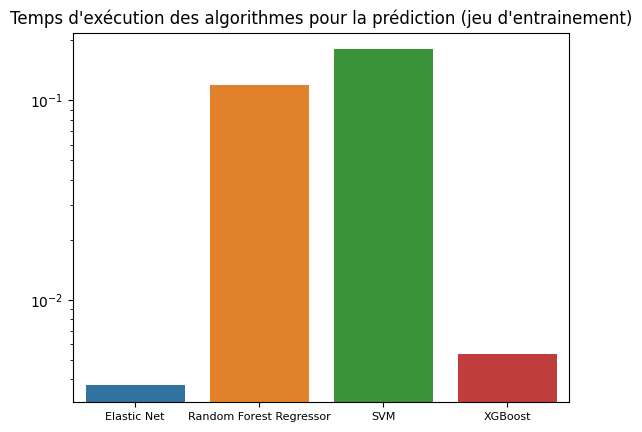

In [152]:
result = []
i = 0
for modele in liste_modeles:
    print(nom_modeles[i], ': ')
    i += 1
    time = %timeit -r 1 -n 1 -o modele.predict(X_train)
    result.append(time.best)
    print('')
plt.title('Temps d\'exécution des algorithmes pour la prédiction (jeu d\'entrainement)')
sns.barplot(x=nom_modeles, y=result)
# Diminuer la police de l'axe X
plt.xticks(fontsize=8)
ax = plt.gca()
ax.set_yscale('log')


le temps d'exécution de XGBoost est plus faible que celui de random forest, ce pourrait être un critère pour choisir éventuellement le XGBoost plutôt que le Random Forest Regressor (quite à dégrader légèrement la performance)

In [153]:
# comparaison_score_melt = pd.melt(comparaison_score.reset_index(), id_vars = ['index'], value_name = 'score', value_vars=['R2', 'RMSE_relative'])
# Réorganisation des données en utilisant la fonction melt pour avoir une structure tabulaire
comparaison_score_melt = pd.melt(comparaison_score.reset_index(), 
                                id_vars=['index'],                    # Variables à conserver telles quelles
                                value_name='score',                    # Nom de la colonne contenant les scores
                                value_vars=['R2', 'RMSE_relative'])     # Variables à transformer en colonne



Text(0.5, 1.0, 'Comparaison des performances des modèles (jeu de test)')

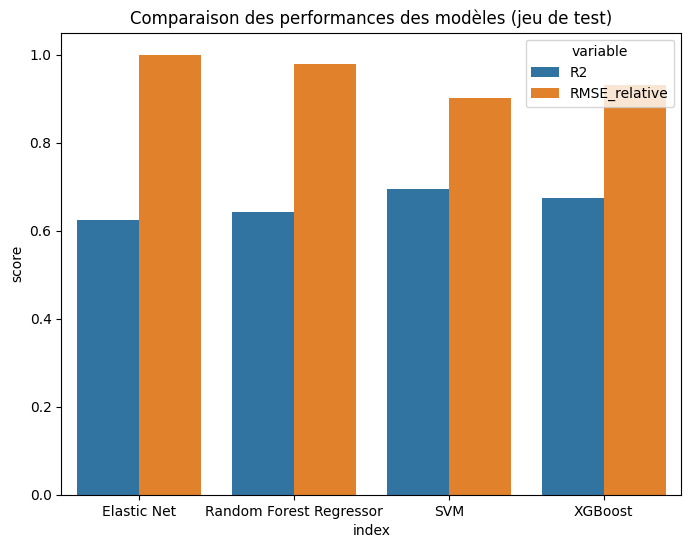

In [154]:
plt.figure(figsize=(8,6))
sns.barplot(x = comparaison_score_melt['index'],
            y = comparaison_score_melt['score'], hue = comparaison_score_melt['variable'])
plt.title('Comparaison des performances des modèles (jeu de test)')

Regardons avec un exemple ce que donne la prédiction

In [155]:
X_extrait = X_test
y_extrait = y_test

In [156]:
X_extrait.head()

,OSEBuildingID,ZipCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,SteamUse(percent),Electricity(percent),NaturalGas(percent),x0_Education,x0_Facility,x0_Health,x0_Leisure,x0_Offices,x0_Other,x0_Residence/Hotel/Senior Care/Housing,x0_Retail,x0_Storage,x0_Supermarket / Grocery Store,x0_Warehouse,x1_BALLARD,x1_CENTRAL,x1_DELRIDGE,x1_DOWNTOWN,x1_EAST,x1_GREATER DUWAMISH,x1_LAKE UNION,x1_MAGNOLIA / QUEEN ANNE,x1_NORTH,x1_NORTHEAST,x1_NORTHWEST,x1_SOUTHEAST,x1_SOUTHWEST,x2_Education,x2_Facility,x2_Health,x2_Leisure,x2_Office,x2_Offices,x2_Other,x2_Parking,"x2_Personal Services (Health/Beauty, Dry Cleaning, etc)",x2_Residence/Hotel/Senior Care/Housing,x2_Retail,x2_Storage,x3_Education,x3_Facility,x3_Health,x3_Leisure,x3_NOT USED,x3_Office,x3_Offices,x3_Other,x3_Parking,"x3_Personal Services (Health/Beauty, Dry Cleaning, etc)",x3_Residence/Hotel/Senior Care/Housing,x3_Retail,x3_Storage,x4_Education,x4_Facility,x4_Health,x4_Leisure,x4_NOT USED,x4_Office,x4_Offices,x4_Other,x4_Other - Technology/Science,x4_Parking,"x4_Personal Services (Health/Beauty, Dry Cleaning, etc)",x4_Residence/Hotel/Senior Care/Housing,x4_Retail,x4_Storage
721,0.433675,-0.536138,-2.052463,0.562189,0.558317,0.041269,-0.543715,-0.335766,-0.673536,-0.503767,-0.341988,-0.229382,-2.035998,2.104567,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1240,2.597790,1.619884,-0.954893,1.938352,1.659860,0.041269,0.097787,0.170130,0.282245,-0.503767,-0.341988,-0.229382,0.820384,-0.740235,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1068,0.761515,0.122647,0.529740,-1.545994,0.007546,0.041269,-0.329881,-0.335766,-0.625235,-0.503767,-0.341988,-0.229382,-1.832488,1.901884,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
923,0.627822,-0.835585,1.843225,-0.428869,0.282932,0.041269,-0.543715,-0.335766,-0.622649,-0.194161,-0.341988,-0.229382,0.214451,-0.136760,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1108,0.805720,-0.775696,-0.355985,0.310514,-1.063399,0.041269,0.097787,-0.335766,-0.515087,-0.223238,-0.341988,-0.229382,-1.300418,1.371971,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [157]:
y_extrait.head()

721     19.490188
1240    19.843599
1068    19.806722
923     20.021014
1108    22.211807
Name: Log2-SiteEnergyUse(kBtu), dtype: float64

In [158]:
# andom Forest Regressor
# prediction = dandom Forest Regressorict_modeles['Random Forest Regressor'].predict(X_extrait)
#  XGBoost 
prediction = dict_modeles['XGBoost'].predict(X_extrait)

Ramenons la prédiction à l'unité qu'on cherche à prédire (inverse du log2(y+1) soit exp2(y)-1

In [159]:
pd.DataFrame(prediction).isna().sum()

0    0
dtype: int64

In [160]:
type(y_extrait)

pandas.core.series.Series

In [161]:
predictions = pd.DataFrame([y_extrait, 
                            pd.Series(prediction, index = y_extrait.index),
                           np.exp2(y_extrait)-1,
                           np.exp2(pd.Series(prediction, index = y_extrait.index))-1]).T
predictions.columns = ['y_log', 'y_predict_log', 'y','y_predict']
# predictions.columns = [ 'y','y_predict','y_log', 'y_predict_log']

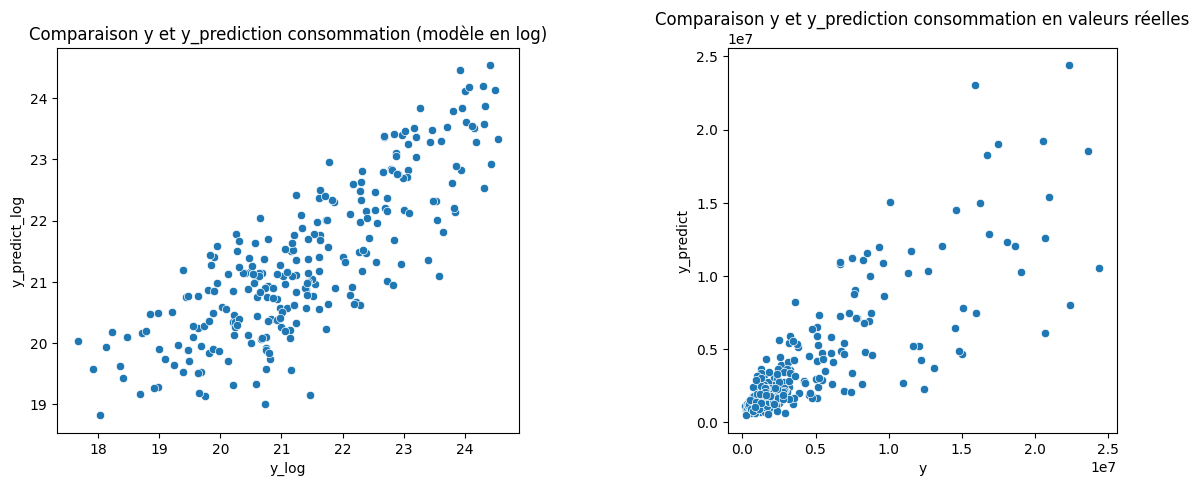

In [162]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=False)
sns.scatterplot(x = predictions['y_log'],
               y = predictions['y_predict_log'],
               ax = ax1)
sns.scatterplot(x = predictions['y'],
               y = predictions['y_predict'],
               ax=ax2)
ax1.set_aspect('equal', 'box')

ax2.set_aspect('equal', 'box')

ax1.title.set_text('Comparaison y et y_prediction consommation (modèle en log)')
ax2.title.set_text('Comparaison y et y_prediction consommation en valeurs réelles')
# ax2.title.set_text('Comparaison y et y_prediction (modèle en log)')
# ax1.title.set_text('Comparaison y et y_prediction en valeurs réelles')


## Comparaison du cumul des prédictions par rapport aux données réelles

# Pertinence des variables

## Permutations des variables

Les permutations aléatoires sont utilisées pour mélanger les données, évaluer les performances des modèles de manière impartiale

Afin de voir si toutes les features ont de l'influence sur nos resultats, essayons de voir l'influence sur notre métrique dans le cas de permutations des features et d'application de notre modèle de prédiction.

3 fonctions ont été testées. La dernière (permutation finale) est la plus pertinente.

Updates:
- permutation par ligne dans le one hot encoding (et non par colonne)
- utilisation du jeu de validation et non le jeu de  test
- mean squared error comme metrics
- cross validation à 3

In [164]:
X_train.shape

(1002, 77)

In [165]:
X_test.shape

(251, 77)

- Les importations nécessaires sont effectuées, y compris le filtrage des avertissements futurs.
- Une liste vide text_columns est créée pour stocker les noms des colonnes correspondant aux vraies features avant la transformation One-Hot Encoding (OHE).
- Les préfixes des colonnes liées à l'application de l'OHE sont stockés dans une liste prefixes, et les indices des colonnes sont stockés dans la liste index_cols.
- Un dictionnaire dict_OHE est créé pour associer chaque préfixe à une liste de colonnes correspondantes.
- Les noms des colonnes correspondant aux vraies features sont ajoutés à la liste text_columns, et leurs indices sont ajoutés à la liste index_cols.
- Les données sont divisées en ensembles d'entraînement et de validation à l'aide de la fonction train_test_split.
- Une boucle est effectuée pour chaque feature.
- Un modèle de régression aléatoire est créé.
- Pour chaque feature, une permutation est effectuée sur les colonnes correspondantes en utilisant la fonction np.random.permutation.
- Le modèle est entraîné sur les données permises, et le score est calculé à l'aide de la validation croisée.
- La feature ayant le score RMSE le plus élevé est identifiée et supprimée.
- Les informations sur la feature supprimée et son score sont affichées.
- Les index des colonnes à supprimer sont identifiés et mis à jour.
- Les colonnes correspondantes sont supprimées des ensembles d'entraînement et de validation.
- La boucle se répète jusqu'à ce que toutes les features aient été évaluées.
- Un DataFrame features_score est créé pour stocker les noms des features et leurs scores RMSE.
- Les informations sur les features supprimées et les colonnes correspondantes sont affichées.

Le code suivant, permet de déterminer l'importance de chaque feature dans un modèle en effectuant des permutations sur les colonnes et en évaluant l'impact sur le score RMSE. Cela permet d'identifier les features les moins importantes et de les supprimer pour améliorer la performance du modèle.


In [166]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

def evaluate_variable_importance(X, y, model):
    # Diviser les données en ensembles d'apprentissage et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Entraîner le modèle sur l'ensemble d'apprentissage
    model.fit(X_train, y_train)
    
    # Évaluer l'importance des variables par permutation
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
    
    # Récupérer les scores d'importance des variables
    importance_scores = result.importances_mean
    
    # Récupérer les colonnes dans l'ordre d'importance décroissante
    sorted_columns = [col for _, col in sorted(zip(importance_scores, X.columns), reverse=True)]
    
    # Afficher les colonnes dans l'ordre d'importance décroissante
    print("Importance des variables :")
    for col in sorted_columns:
        print(col)
    
    # Effectuer des tests statistiques en créant des distributions nulles
    print("\nTests statistiques - Distributions nulles :")
    for col in sorted_columns:
        permuted_X = X.copy()
        permuted_X[col] = np.random.permutation(permuted_X[col])
        permuted_result = permutation_importance(model, permuted_X, y, n_repeats=10, random_state=42)
        p_value = (permuted_result.importances_mean > importance_scores[sorted_columns.index(col)]).mean()
        print(f"{col}: p-value = {p_value:.4f}")


In [167]:
data.dtypes

OSEBuildingID                      int64  
PrimaryPropertyType                object 
ZipCode                            float64
Neighborhood                       object 
Latitude                           float64
Longitude                          float64
YearBuilt                          int64  
NumberofBuildings                  float64
NumberofFloors                     int64  
PropertyGFAParking                 int64  
PropertyGFABuilding(s)             int64  
LargestPropertyUseType             object 
SecondLargestPropertyUseType       object 
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseType        object 
ThirdLargestPropertyUseTypeGFA     float64
SiteEnergyUse(kBtu)                float64
SteamUse(percent)                  float64
Electricity(percent)               float64
NaturalGas(percent)                float64
Log2-SiteEnergyUse(kBtu)           float64
dtype: object

In [168]:
# data_encoded = data.copy()
# from sklearn.preprocessing import OneHotEncoder

# # Supposons que ton DataFrame s'appelle "data" contenant toutes les colonnes
# # Tu peux remplacer "data" par le nom de ton DataFrame

# # Sélectionner les colonnes catégorielles
# X_categorical = data.select_dtypes(include='object')  # Sélectionne toutes les colonnes de type 'object'

# # Sélectionner les colonnes numériques
# X_numerical = data.select_dtypes(include=['int64', 'float64'])  # Sélectionne toutes les colonnes de type 'int' et 'float'

# # # Exemple d'utilisation de la fonction
# # X_categorical = data[['colonne_catégorielle_1', 'colonne_catégorielle_2']]  # Colonnes catégorielles à encoder
# # X_numerical = data.drop(["SiteEnergyUseWN(kBtu)", 'colonne_catégorielle_1', 'colonne_catégorielle_2'], axis=1)  # Colonnes numériques

# # Encoder les colonnes catégorielles avec l'encodage one-hot
# encoder = OneHotEncoder()
# X_categorical_encoded = encoder.fit_transform(X_categorical)

# import pandas as pd
# from scipy.sparse import csr_matrix

# # Supposons que tu as déjà encodé les colonnes catégorielles avec OneHotEncoder et obtenu une matrice creuse nommée "X_categorical_encoded"
# # Supposons également que tu as une DataFrame pour les colonnes numériques nommée "X_numerical"

# # Convertir la matrice creuse en DataFrame
# X_categorical_encoded_df = pd.DataFrame.sparse.from_spmatrix(X_categorical_encoded)

# # Fusionner les colonnes catégorielles encodées (DataFrame) et les colonnes numériques (DataFrame)
# X = pd.concat([X_categorical_encoded_df, X_numerical], axis=1)
# y = data["SiteEnergyUseWN(kBtu)"]  # Variable cible

# # # Fusionner les colonnes catégorielles encodées et les colonnes numériques
# # X = pd.concat([X_categorical_encoded, X_numerical], axis=1)
# # y = data["SiteEnergyUseWN(kBtu)"]  # Variable cible

# for nom_modele, modele in zip(nom_modeles, liste_modeles):
#     print(f"\nImportance des variables pour le modèle {nom_modele}:")
#     evaluate_variable_importance(X, y, modele)



In [169]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import cross_val_score

# Création d'un dictionnaire pour les colonnes créées par le OHE, pour les retrouver dans l'application des permutations
text_columns = []  # Les noms des colonnes qui correspondent à des vraies features (pré OHE)
prefixes = []  # Les préfixes des colonnes liées à l'application du OHE
index_cols = []  # Les indices des colonnes qui correspondent aux features pré OHE et à la première colonne de chaque feature du OHE
regex = re.compile(r'x\d_')

# Parcours des colonnes de X
for j, column in enumerate(X.columns):
    if regex.search(column):
        if column[:2] not in prefixes:
            prefixes.append(column[:2])
            index_cols.append(j)
    else:
        text_columns.append(column)
        index_cols.append(j)
        
dict_OHE = {}
# Parcours des préfixes
for prefix in prefixes:
    temp_list = []
    # Parcours des colonnes de X
    for column in X.columns:
        if prefix in column:
            temp_list.append(column)
    dict_OHE[prefix] = temp_list
    text_columns.append(prefix)

# Préparation du jeu de données
X_train_permut, X_validation_permut, y_train_permut, y_validation = train_test_split(X_train,
                                        y_train,
                                        test_size=0.2,
                                        random_state=42
                                        )

# Boucle sur le nombre de features
list_features = text_columns
features_score = pd.DataFrame({})
for num_feature in range(len(text_columns)):
    print('\nBoucle {}.'.format(num_feature+1))
    scores = []
    
    # Entraînement du modèle sur le jeu de données sans les éventuelles features supprimées
    model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, 
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=-1, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
    
    # Pour chaque feature de X_test
    for j, feature in zip(index_cols, list_features):
        X_validation_temp = X_validation_permut.copy()
        
        # Si on identifie une feature en "X0_", on fait une permutation sur plusieurs colonnes
        if regex.search(X_validation_permut.iloc[:, j].name):
            prefixe = X_validation_permut.iloc[:, j].name[:2]
            for prefixe_col in dict_OHE[prefixe]:
                index_col = X_validation_permut.columns.get_loc(prefixe_col)
                X_columns_temp = X_validation_temp.iloc[:, index_col]
                X_validation_temp.iloc[:, index_col] = np.random.permutation(X_columns_temp.T).T
        # Sinon, on fait une permutation sur une seule colonne
        else:             
            X_validation_temp.iloc[:, j] = np.random.permutation(X_validation_temp.iloc[:, j])
        
        # Entraînement du modèle et ajout du score
        scores.append(cross_val_score(model, 
                                      X_validation_temp, 
                                      y_validation, 
                                      cv=3,
                                      scoring='neg_mean_squared_error',
                                      n_jobs=-1).mean())
        print('    j : {}, feature : {}, score : {}'.format(j, feature, scores[-1]))
    
    # Identification de la feature avec la RMSE la plus faible en valeur absolue
    feature_to_remove_index = scores.index(max(scores))
    
    # Stockage du nom de la feature et du score
    feature_name = X_train_permut.columns[index_cols[feature_to_remove_index]]
    print('feature name : ', feature_name)
    if regex.search(feature_name):
        feature_name = feature_name[:3]
        print('feature name : ', feature_name)
    
    features_score = pd.concat([features_score,
                                pd.DataFrame({'feature': feature_name,
                                              'RMSE': scores[feature_to_remove_index]
                                             }, index=[0])
                               ])
    # Affichage des informations
    print ('\nBoucle {}. Feature {} supprimée  : score = {}'.format(
        num_feature+1, 
        list_features[feature_to_remove_index],
        scores[feature_to_remove_index], 
        min(scores)))
    
    # Identification des numéros de colonne des features à supprimer
    if regex.search(feature_name):
        print('      indice colonne de base à supprimer : ', index_cols[feature_to_remove_index])
        print('      indice de la colonne correspondant à la prochaine feature OHE', index_cols[feature_to_remove_index]+len(dict_OHE[feature_name[:2]]))
        liste_index = list(
            range(index_cols[feature_to_remove_index],
                  index_cols[feature_to_remove_index]+len(dict_OHE[feature_name[:2]]),
                  1)
        )
    else:
        liste_index = index_cols[feature_to_remove_index]
    
    # Mise à jour de la liste des features avec la feature en moins pour le prochain tour de boucle
    for k, indice in enumerate(index_cols):
        if index_cols.index(indice) > feature_to_remove_index:
            if type(liste_index) is int:
                index_cols[k] -= 1
            else:
                index_cols[k] -= len(liste_index)
    
    print('      index à supprimer ', liste_index)
    
    del list_features[feature_to_remove_index]
    if regex.search(feature_name):
        del dict_OHE[feature_name[:2]]
        
    del index_cols[feature_to_remove_index]
    
    print('      feature to remove index', liste_index)
    print('      Colonnes supprimées : ', X_train_permut.columns[liste_index])
    X_train_permut.drop(X_train_permut.columns[liste_index], axis=1, inplace=True)
    X_validation_permut.drop(X_validation_permut.columns[liste_index], axis=1, inplace=True)



Boucle 1.
    j : 0, feature : OSEBuildingID, score : -1.1644535376257863
    j : 1, feature : ZipCode, score : -1.115693690396691
    j : 2, feature : Latitude, score : -1.1151892426805443
    j : 3, feature : Longitude, score : -1.1087272251215847
    j : 4, feature : YearBuilt, score : -1.1177081388306593
    j : 5, feature : NumberofBuildings, score : -1.091135900728676
    j : 6, feature : NumberofFloors, score : -1.1180784861046942
    j : 7, feature : PropertyGFAParking, score : -1.092102748171098
    j : 8, feature : PropertyGFABuilding(s), score : -1.3227011174006214
    j : 9, feature : SecondLargestPropertyUseTypeGFA, score : -1.1256465712407318
    j : 10, feature : ThirdLargestPropertyUseTypeGFA, score : -1.0940333377088056
    j : 11, feature : SteamUse(percent), score : -1.1180998892921077
    j : 12, feature : Electricity(percent), score : -1.118110078059656
    j : 13, feature : NaturalGas(percent), score : -1.1097077470669057
    j : 14, feature : x0, score : -1.1563

    j : 8, feature : SteamUse(percent), score : -1.0461585435508793
    j : 9, feature : Electricity(percent), score : -1.0696767724609766
    j : 10, feature : NaturalGas(percent), score : -1.0542487848295756
    j : 11, feature : x0, score : -1.0731114097919165
    j : 22, feature : x1, score : -1.0207500547396526
    j : 35, feature : x2, score : -1.1007065065143384
feature name :  Longitude

Boucle 6. Feature Longitude supprimée  : score = -1.0110946939048437
      index à supprimer  2
      feature to remove index 2
      Colonnes supprimées :  Longitude

Boucle 7.
    j : 0, feature : OSEBuildingID, score : -1.0705958699305935
    j : 1, feature : Latitude, score : -1.0283622178144398
    j : 2, feature : YearBuilt, score : -1.0080281606546
    j : 3, feature : NumberofBuildings, score : -0.9942701238633406
    j : 4, feature : PropertyGFABuilding(s), score : -1.2346791540291566
    j : 5, feature : SecondLargestPropertyUseTypeGFA, score : -1.0440842855040582
    j : 6, feature :

    j : 0, feature : NumberofBuildings, score : -0.9404470729853007
    j : 1, feature : PropertyGFABuilding(s), score : -1.7077644755576697
    j : 2, feature : SecondLargestPropertyUseTypeGFA, score : -1.0023248456032476
    j : 3, feature : Electricity(percent), score : -1.0539873637341506
    j : 4, feature : x0, score : -1.3555934689463836
feature name :  NumberofBuildings

Boucle 15. Feature NumberofBuildings supprimée  : score = -0.9404470729853007
      index à supprimer  0
      feature to remove index 0
      Colonnes supprimées :  NumberofBuildings

Boucle 16.
    j : 0, feature : PropertyGFABuilding(s), score : -1.621777615010659
    j : 1, feature : SecondLargestPropertyUseTypeGFA, score : -0.9993384932664595
    j : 2, feature : Electricity(percent), score : -1.1046125387457264
    j : 3, feature : x0, score : -1.4010773096625206
feature name :  SecondLargestPropertyUseTypeGFA

Boucle 16. Feature SecondLargestPropertyUseTypeGFA supprimée  : score = -0.9993384932664595
   

In [170]:
features_score

,feature,RMSE
0,x3_,-1.087913
0,x4_,-1.051727
0,PropertyGFAParking,-1.036884
0,ZipCode,-1.025123
0,NumberofFloors,-1.018134
0,Longitude,-1.011095
0,ThirdLargestPropertyUseTypeGFA,-0.988725
0,Latitude,-0.974580
0,NaturalGas(percent),-0.974289
0,SteamUse(percent),-0.972947


In [171]:
graphe_features = features_score.reset_index().drop(['index'], axis=1).reset_index()
graphe_features['index'] +=1
graphe_features['RMSE'] = (abs(graphe_features['RMSE'])).apply(math.sqrt)

In [172]:
# import seaborn as sns
# plt.figure(figsize=(15,5))
# plt.title('Evolution du score en supprimant des features par permutation')
# sns.lineplot( x = graphe_features['index'].values,
#             y = graphe_features["RMSE"])
# sns.lineplot([1,graphe_features.shape[0]],[graphe_features.iloc[0,2], graphe_features.iloc[0,2]])
# plt.xlabel('Nombre de features supprimées')
# plt.ylabel('Score : RMSE')
# plt.legend(['Score avec suppression des features',
#            'Score de référence'])
# ax = plt.gca()

# plt.show()

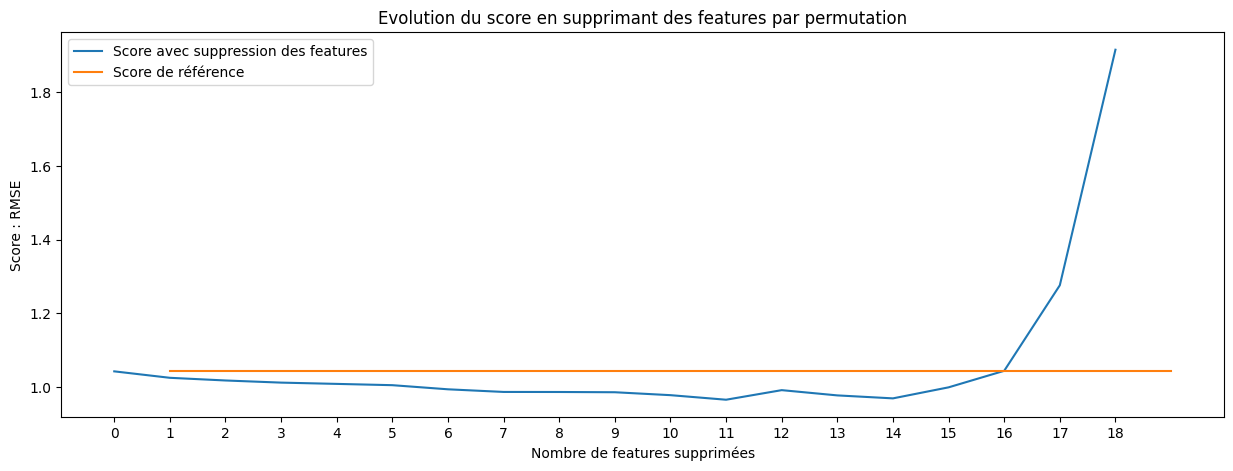

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.title('Evolution du score en supprimant des features par permutation')
sns.lineplot(x=graphe_features.index, y=graphe_features["RMSE"])
sns.lineplot([1, graphe_features.shape[0]], [graphe_features.iloc[0, 2], graphe_features.iloc[0, 2]])
plt.xlabel('Nombre de features supprimées')
plt.ylabel('Score : RMSE')
plt.legend(['Score avec suppression des features', 'Score de référence'])
ax = plt.gca()

# Afficher les valeurs de X de 1 en 1
plt.xticks(graphe_features.index[::1])

plt.show()


Observations :
* On peut supprimer 12 features en améliorant un peu le modèle.


In [174]:
graphe_features['feature'].replace({
    'x0_' : 'BuildingType', 
    'x1_' : 'PrimaryPropertyType',
    'x2_' : 'Neighborhood',
    'x3_' : 'LargestPropertyUseType',
    'x4_' : 'SecondLargestPropertyUseType',
    'x5_' : 'ThirdLargestPropertyUseType', 
    'x6_' : 'Outlier'
}, inplace=True)

Le graphe ci-dessus peut être également affiché sous la façon suivante, en affichant le nom des features identifier leur importance relative

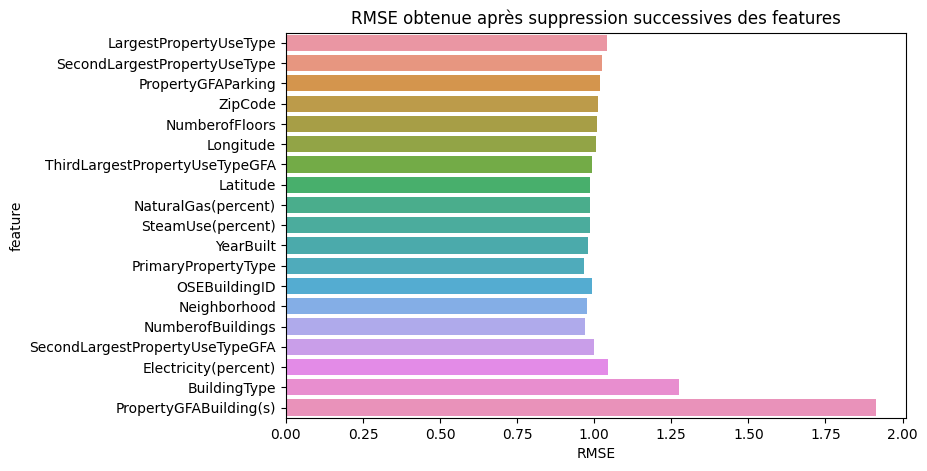

In [175]:
plt.figure(figsize=(8,5))
plt.title('RMSE obtenue après suppression successives des features')
sns.barplot(x = graphe_features['RMSE'],
           y = graphe_features['feature'])
plt.show()

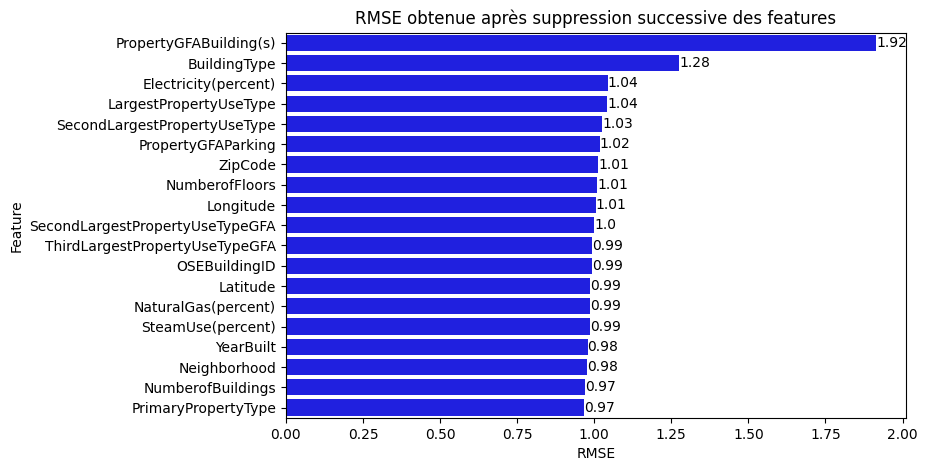

In [176]:
plt.figure(figsize=(8, 5))
plt.title('RMSE obtenue après suppression successive des features')

# Triage des données par ordre décroissant des pourcentages
graphe_features_sorted = graphe_features.sort_values('RMSE', ascending=False)

# Affichage des barres en position verticale avec axes échangés et données triées
sns.barplot(x=graphe_features_sorted['RMSE'], y=graphe_features_sorted['feature'], color='blue')

# Ajout des pourcentages en haut de chaque barre
for i, v in enumerate(graphe_features_sorted['RMSE']):
    plt.text(v, i, str(round(v, 2)), va='center')

plt.xlabel('RMSE')
plt.ylabel('Feature')
plt.show()


### Bilan des permutations

Les résultats obtenus ci-dessus sont assez cohérents avec l'enjeu de la 
* les 2 features les plus significatives sont la surface dédiée à l'usage principal du bâtiment et son usage principal.

Pour simplifier la collecte de données, on pourrait éventuellement réduire notre jeu de données aux features suivantes avec une dégradation minimale du score :
* PropertyGFABuidling(s)
* BuildingType
* Electricity(percent)
* LargestPropertyUseType
* SecondLargestPropertyUseType
* PropertyGFAParking

On pourrait aussi légèrement améliorer le modèle en supprimant plusieurs features suivantes du jeu de données: 

# Intérêt du Energy Star Score

Entrainons un nouveau modèle avec le Energy Star Score

In [179]:
X_en = X.copy()

In [180]:
X_en['energy_star_score'] = energy_star_score

In [181]:
y_en = y['Log2-SiteEnergyUse(kBtu)'].copy()
y_en.drop(X_en[X_en['energy_star_score'].isna()].index, inplace=True)
# y_en = y['SiteEnergyUseWN(kBtu)'].copy()
# y_en.drop(X_en[X_en['energy_star_score'].isna()].index, inplace=True)

In [182]:
X_en.drop(X_en[X_en['energy_star_score'].isna()].index, inplace=True)

In [183]:
from sklearn.model_selection import train_test_split
X_en_train, X_en_test, y_en_train, y_en_test = \
                        train_test_split(X_en, 
                                         y_en,  
                                         test_size = 0.2, 
                                         random_state = 42
                                        )


In [184]:
parameters = {
    'n_estimators' : [100,500,1000,2000]
}
model_en = GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                               #scoring='mean_squared_error',
                              verbose=2,
                               cv=5)

model_en.fit(X_en_train, y_en_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ...................................n_estimators=100; total time=   0.6s
[CV] END ...................................n_estimators=100; total time=   0.6s
[CV] END ...................................n_estimators=100; total time=   0.6s
[CV] END ...................................n_estimators=100; total time=   0.6s
[CV] END ...................................n_estimators=100; total time=   0.6s
[CV] END ...................................n_estimators=500; total time=   3.5s
[CV] END ...................................n_estimators=500; total time=   3.5s
[CV] END ...................................n_estimators=500; total time=   3.8s
[CV] END ...................................n_estimators=500; total time=   3.6s
[CV] END ...................................n_estimators=500; total time=   3.4s
[CV] END ..................................n_estimators=1000; total time=   7.3s
[CV] END ..................................n_esti

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [100, 500, 1000, 2000]}, verbose=2)

In [185]:
math.sqrt(mean_squared_error(model_en.predict(X_en_test), y_en_test))

0.7931298557889148

In [186]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
 # Calcul du RMSE
y_pred_test = model_en.predict(X_en_test)

rmse = math.sqrt(mean_squared_error(y_en_test, y_pred_test))
print("RMSE(log):", rmse)

# Calcul du MAPE
map_score = mean_absolute_percentage_error(y_en_test, y_pred_test)
print("MAPE(log):", map_score)

# Calcul du R²
r2 = r2_score(y_en_test, y_pred_test)
print("R²(log):", r2)

# Calcul de l'erreur quadratique moyenne en pourcentage (MPSE)
mpse = math.sqrt(mean_squared_error(y_en_test, y_pred_test)) / y_en_test.mean() * 100
print("MPSE :", mpse)

# Calcul du taux de prédictions entre 90% et 110% de la valeur réelle
predictions_within_range = ((y_pred_test >= 0.9 * y_en_test) & (y_pred_test <= 1.1 * y_en_test)).mean() * 100
print("Taux de prédictions entre 90% et 110% :", predictions_within_range) 

RMSE(log): 0.7931298557889148
MAPE(log): 0.02782948944929485
R²(log): 0.7296692680577472
MPSE : 3.7104644204625408
Taux de prédictions entre 90% et 110% : 97.21115537848605


In [187]:
# Calcul du RMSE
y_pred_test = model_en.predict(X_en_test)
y_pred_test_rfe = y_pred_test
rmse_e = math.sqrt(mean_squared_error(np.exp2(y_en_test), np.exp2(y_pred_test)))
print("RMSE (exp):", rmse_e)

# Calcul du MAP
map_score_e = mean_absolute_percentage_error(np.exp2(y_en_test), np.exp2(y_pred_test))
print("MAPE (exp) :", map_score_e)

# Calcul du R²
r2_e = r2_score(np.exp2(y_en_test), np.exp2(y_pred_test))
print("R² (exp) :", r2_e)

# Calcul de l'erreur quadratique moyenne en pourcentage (MPSE)
mpse_e = math.sqrt(mean_squared_error(np.exp2(y_en_test), np.exp2(y_pred_test))) / np.exp2(y_en_test.mean()) * 100
print("MPSE (exp) :", mpse_e)

# Calcul du taux de prédictions entre 90% et 110% de la valeur réelle
predictions_within_range_e = ((np.exp2(y_pred_test) >= 0.9 * np.exp2(y_en_test)) & (np.exp2(y_pred_test) <= 1.1 * np.exp2(y_en_test))).mean() * 100 
print("Taux de prédictions entre 90% et 110% (exp) :", predictions_within_range_e)

RMSE (exp): 2912360.389139325
MAPE (exp) : 0.45509633368663566
R² (exp) : 0.688685630031769
MPSE (exp) : 107.04890450219429
Taux de prédictions entre 90% et 110% (exp) : 19.52191235059761


In [188]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000]
}

model_xgb = GridSearchCV(XGBRegressor(),
                         param_grid=parameters,
                         # scoring='mean_squared_error',
                         verbose=2,
                         cv=5)

model_xgb.fit(X_en_train, y_en_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=500; total time=   0.8s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=500; total time=   0.8s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=500; total time=   0.8s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=500; total time=   0.7s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=500; total time=   0.7s
[CV] END ..learning_rate=0.1, max_depth=3, n_estimators=1000; total time=   1.5s
[CV] END ..learning_rate=0.1, max_depth=3, n_es

[CV] END learning_rate=0.001, max_depth=3, n_estimators=1000; total time=   1.3s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=1000; total time=   1.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=1000; total time=   1.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=1000; total time=   1.3s
[CV] END .learning_rate=0.001, max_depth=5, n_estimators=100; total time=   0.0s
[CV] END .learning_rate=0.001, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END .learning_rate=0.001, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END .learning_rate=0.001, max_depth=5, n_estimators=100; total time=   0.0s
[CV] END .learning_rate=0.001, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END .learning_rate=0.001, max_depth=5, n_estimators=500; total time=   0.5s
[CV] END .learning_rate=0.001, max_depth=5, n_estimators=500; total time=   0.5s
[CV] END .learning_rate=0.001, max_depth=5, n_estimators=500; total time=   0.6s
[CV] END .learning_rate=0.00

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
          

In [189]:
math.sqrt(mean_squared_error(model_xgb.predict(X_en_test), y_en_test))

0.7354969678027949

In [190]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
 # Calcul du RMSE
y_pred_test = model_xgb.predict(X_en_test)
rmse = math.sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE(log):", rmse)

# Calcul du MAPE
map_score = mean_absolute_percentage_error(y_test, y_pred_test)
print("MAPE(log):", map_score)

# Calcul du R²
r2 = r2_score(y_test, y_pred_test)
print("R²(log):", r2)

# Calcul de l'erreur quadratique moyenne en pourcentage (MPSE)
mpse = math.sqrt(mean_squared_error(y_test, y_pred_test)) / y_test.mean() * 100
print("MPSE :", mpse)

# Calcul du taux de prédictions entre 90% et 110% de la valeur réelle
predictions_within_range = ((y_pred_test >= 0.9 * y_test) & (y_pred_test <= 1.1 * y_test)).mean() * 100
print("Taux de prédictions entre 90% et 110% :", predictions_within_range) 

RMSE(log): 0.7354969678027949
MAPE(log): 0.02613420743205353
R²(log): 0.7675291000479232
MPSE : 3.4408430227050544
Taux de prédictions entre 90% et 110% : 98.40637450199203


In [191]:
# Calcul du RMSE
y_pred_test = model_xgb.predict(X_en_test)
y_pred_test_xgb = y_pred_test
rmse = math.sqrt(mean_squared_error(np.exp2(y_test), np.exp2(y_pred_test)))
print("RMSE (exp):", rmse)

# Calcul du MAP
map_score = mean_absolute_percentage_error(np.exp2(y_test), np.exp2(y_pred_test))
print("MAPE (exp) :", map_score)

# Calcul du R²
r2 = r2_score(np.exp2(y_test), np.exp2(y_pred_test))
print("R² (exp) :", r2)

# Calcul de l'erreur quadratique moyenne en pourcentage (MPSE)
mpse = math.sqrt(mean_squared_error(np.exp2(y_test), np.exp2(y_pred_test))) / np.exp2(y_test.mean()) * 100
print("MPSE :", mpse)

# Calcul du taux de prédictions entre 90% et 110% de la valeur réelle
predictions_within_range = ((np.exp2(y_pred_test) >= 0.9 * np.exp2(y_test)) & (np.exp2(y_pred_test) <= 1.1 * np.exp2(y_test))).mean() * 100 
print("Taux de prédictions entre 90% et 110% :", predictions_within_range)

RMSE (exp): 2782404.8345840843
MAPE (exp) : 0.4106445950608049
R² (exp) : 0.7158487472423918
MPSE : 102.272160593373
Taux de prédictions entre 90% et 110% : 15.139442231075698


Entrainons un autre modèle avec les mêmes données sans le Energy Star Score

In [192]:
X_en_train.drop(['energy_star_score'], axis=1, inplace=True)
X_en_test.drop(['energy_star_score'], axis=1, inplace=True)

In [193]:
parameters = {
    'n_estimators' : [100,500,1000,2000]
}
model_en = GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                               #scoring='mean_squared_error',
                              verbose=2,
                               cv=5)

model_en.fit(X_en_train, y_en_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ...................................n_estimators=100; total time=   0.6s
[CV] END ...................................n_estimators=100; total time=   0.6s
[CV] END ...................................n_estimators=100; total time=   0.6s
[CV] END ...................................n_estimators=100; total time=   0.7s
[CV] END ...................................n_estimators=100; total time=   0.7s
[CV] END ...................................n_estimators=500; total time=   3.2s
[CV] END ...................................n_estimators=500; total time=   3.2s
[CV] END ...................................n_estimators=500; total time=   3.1s
[CV] END ...................................n_estimators=500; total time=   3.1s
[CV] END ...................................n_estimators=500; total time=   3.5s
[CV] END ..................................n_estimators=1000; total time=   6.5s
[CV] END ..................................n_esti

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [100, 500, 1000, 2000]}, verbose=2)

In [194]:
math.sqrt(mean_squared_error(model_en.predict(X_en_test), y_en_test)) 

0.8485651787124797

In [195]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
 # Calcul du RMSE
y_pred_test = model_en.predict(X_en_test)
rmse = math.sqrt(mean_squared_error(y_en_test, y_pred_test))
print("RMSE(log):", rmse)

# Calcul du MAPE
map_score = mean_absolute_percentage_error(y_en_test, y_pred_test)
print("MAPE(log):", map_score)

# Calcul du R²
r2 = r2_score(y_en_test, y_pred_test)
print("R²(log):", r2)

# Calcul de l'erreur quadratique moyenne en pourcentage (MPSE)
mpse = math.sqrt(mean_squared_error(y_en_test, y_pred_test)) / y_en_test.mean() * 100
print("MPSE :", mpse)

# Calcul du taux de prédictions entre 90% et 110% de la valeur réelle
predictions_within_range = ((y_pred_test >= 0.9 * y_en_test) & (y_pred_test <= 1.1 * y_en_test)).mean() * 100
print("Taux de prédictions entre 90% et 110% :", predictions_within_range) 

RMSE(log): 0.8485651787124797
MAPE(log): 0.030785291257477112
R²(log): 0.6905594414987779
MPSE : 3.969805046519469
Taux de prédictions entre 90% et 110% : 96.81274900398407


In [196]:
# Calcul du RMSE
y_pred_test = model_en.predict(X_en_test)

rmse = math.sqrt(mean_squared_error(np.exp2(y_en_test), np.exp2(y_pred_test)))
print("RMSE (exp):", rmse)

# Calcul du MAP
map_score = mean_absolute_percentage_error(np.exp2(y_en_test), np.exp2(y_pred_test))
print("MAPE (exp) :", map_score)

# Calcul du R²
r2 = r2_score(np.exp2(y_en_test), np.exp2(y_pred_test))
print("R² (exp) :", r2)

# Calcul de l'erreur quadratique moyenne en pourcentage (MPSE)
mpse = math.sqrt(mean_squared_error(np.exp2(y_en_test), np.exp2(y_pred_test))) / np.exp2(y_en_test.mean()) * 100
print("MPSE (exp) :", mpse)

# Calcul du taux de prédictions entre 90% et 110% de la valeur réelle
predictions_within_range = ((np.exp2(y_pred_test) >= 0.9 * np.exp2(y_en_test)) & (np.exp2(y_pred_test) <= 1.1 * np.exp2(y_en_test))).mean() * 100 
print("Taux de prédictions entre 90% et 110% (exp) :", predictions_within_range)

RMSE (exp): 3131255.8183307564
MAPE (exp) : 0.5042316297250108
R² (exp) : 0.6401296743004237
MPSE (exp) : 115.09478920206323
Taux de prédictions entre 90% et 110% (exp) : 16.334661354581673


In [197]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000]
}

model_xgb = GridSearchCV(XGBRegressor(),
                         param_grid=parameters,
                         # scoring='mean_squared_error',
                         verbose=2,
                         cv=5)

model_xgb.fit(X_en_train, y_en_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=500; total time=   0.7s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=500; total time=   0.6s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=500; total time=   0.6s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=500; total time=   0.6s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=500; total time=   0.6s
[CV] END ..learning_rate=0.1, max_depth=3, n_estimators=1000; total time=   1.3s
[CV] END ..learning_rate=0.1, max_depth=3, n_es

[CV] END learning_rate=0.001, max_depth=3, n_estimators=1000; total time=   1.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=1000; total time=   1.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=1000; total time=   1.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=1000; total time=   1.3s
[CV] END .learning_rate=0.001, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END .learning_rate=0.001, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END .learning_rate=0.001, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END .learning_rate=0.001, max_depth=5, n_estimators=100; total time=   0.0s
[CV] END .learning_rate=0.001, max_depth=5, n_estimators=100; total time=   0.0s
[CV] END .learning_rate=0.001, max_depth=5, n_estimators=500; total time=   0.5s
[CV] END .learning_rate=0.001, max_depth=5, n_estimators=500; total time=   0.6s
[CV] END .learning_rate=0.001, max_depth=5, n_estimators=500; total time=   0.6s
[CV] END .learning_rate=0.00

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
          

In [198]:
math.sqrt(mean_squared_error(model_xgb.predict(X_en_test), y_en_test))

0.8208169059720178

In [199]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
 # Calcul du RMSE
y_pred_test = model_xgb.predict(X_en_test)
rmse = math.sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE(log):", rmse)

# Calcul du MAPE
map_score = mean_absolute_percentage_error(y_test, y_pred_test)
print("MAPE(log):", map_score)

# Calcul du R²
r2 = r2_score(y_test, y_pred_test)
print("R²(log):", r2)

# Calcul de l'erreur quadratique moyenne en pourcentage (MPSE)
mpse = math.sqrt(mean_squared_error(y_test, y_pred_test)) / y_test.mean() * 100
print("MPSE :", mpse)

# Calcul du taux de prédictions entre 90% et 110% de la valeur réelle
predictions_within_range = ((y_pred_test >= 0.9 * y_test) & (y_pred_test <= 1.1 * y_test)).mean() * 100
print("Taux de prédictions entre 90% et 110% :", predictions_within_range) 

RMSE(log): 0.8208169059720178
MAPE(log): 0.02995658868133015
R²(log): 0.710466107355926
MPSE : 3.8399915260961808
Taux de prédictions entre 90% et 110% : 98.80478087649402


In [200]:
# Calcul du RMSE
y_pred_test = model_xgb.predict(X_en_test)
y_pred_test_xb = y_pred_test
rmse = math.sqrt(mean_squared_error(np.exp2(y_test), np.exp2(y_pred_test)))
print("RMSE (exp):", rmse)

# Calcul du MAP
map_score = mean_absolute_percentage_error(np.exp2(y_test), np.exp2(y_pred_test))
print("MAPE (exp) :", map_score)

# Calcul du R²
r2 = r2_score(np.exp2(y_test), np.exp2(y_pred_test))
print("R² (exp) :", r2)

# Calcul de l'erreur quadratique moyenne en pourcentage (MPSE)
mpse = math.sqrt(mean_squared_error(np.exp2(y_test), np.exp2(y_pred_test))) / np.exp2(y_test.mean()) * 100
print("MPSE :", mpse)

# Calcul du taux de prédictions entre 90% et 110% de la valeur réelle
predictions_within_range = ((np.exp2(y_pred_test) >= 0.9 * np.exp2(y_test)) & (np.exp2(y_pred_test) <= 1.1 * np.exp2(y_test))).mean() * 100 
print("Taux de prédictions entre 90% et 110% :", predictions_within_range)

RMSE (exp): 3017393.658779365
MAPE (exp) : 0.48195043161897705
R² (exp) : 0.6658258260609429
MPSE : 110.9095861998233
Taux de prédictions entre 90% et 110% : 14.741035856573706


<!-- ## Metrique avec Energie score :
- RMSE (exp): 287584.9522929458
- MAPE (exp) : 0.031194994413070238
- R² (exp) : 0.9984554812600384
- MPSE (exp) : 9.178626515707638
- Taux de prédictions entre 90% et 110% (exp) : 97.92746113989638

## Metrique sans Energie Score
- RMSE (exp): 276078.14772999316
- MAPE (exp) : 0.030667592834532364
- R² (exp) : 0.998576606655381
- MPSE (exp) : 8.811372733371359
- Taux de prédictions entre 90% et 110% (exp) : 97.92746113989638 -->

Le résultat obtenu ici avec le Energy Star Score est bien moins bon que le modèle initial, où on avait davantage de données (1500 obsevations supplémentaires). On voit cependant qu'à iso échantillon, le Energy Star Score améliore très légèrement la performance et semble donc pertinent . Cependant, dans la mesure où:
* il est manquant pour un certain nombre de données de l'échantillon (et donc potentiellement des futurs bâtiments pour lesquels il faudra faire tourner le modèle)
* il est fastidieux à calculer

On peut tout à fait se passer du Energy Star Score au prix d'un modèle légèrement moins précis (cf parties précédentes du notebook) mais avec une complexité moindre pour l'ensemble du processus. Dans le cas où les équipes parviendraient à estimer de façon simple le Energy Star Score, la question serait à reconsidérer et il serait alors pertinent de l'intégrer au modèle

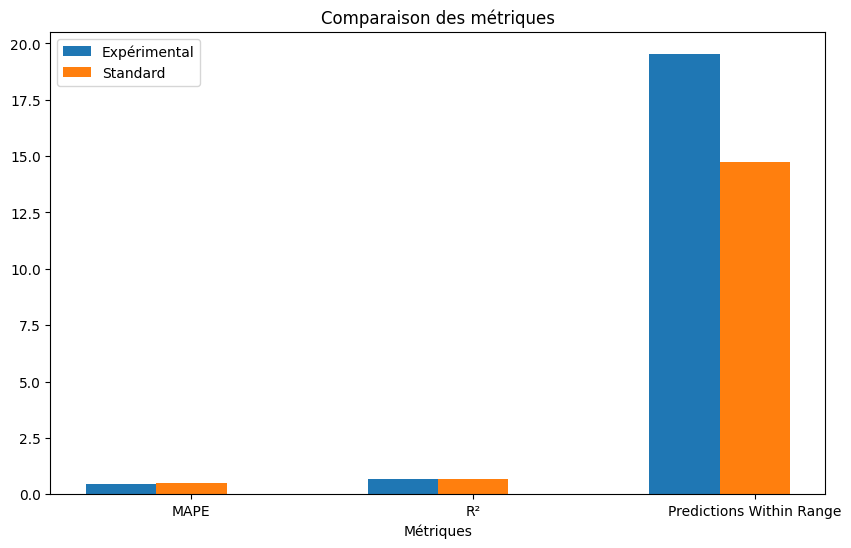

In [201]:
import matplotlib.pyplot as plt
import numpy as np

def compare_metrics_final(metrics_exp, metrics):
    # Noms des métriques
    metrics_names = ['MAPE', 'R²', 'Predictions Within Range']
    
    # Création du graphique
    fig, ax = plt.subplots(figsize=(10, 6))
    x = np.arange(len(metrics_exp))
    width = 0.25
    
    # Barres pour les métriques expérimentales
    ax.bar(x - width, metrics_exp, width, label='Expérimental')
    # Barres pour les métriques standard
    ax.bar(x, metrics, width, label='Standard')
    
    # Configurations de l'axe des x
    ax.set_xticks(x)
    ax.set_xticklabels(metrics_names)
    ax.set_xlabel('Métriques')
    
    # Légende et titre du graphique
    ax.legend()
    ax.set_title('Comparaison des métriques')
    
    # Affichage du graphique
    plt.show()

# Exemple d'utilisation de la fonction avec des données
metrics_exp = [map_score_e, r2_e, predictions_within_range_e]
metrics = [map_score, r2, predictions_within_range]

# Appel de la fonction pour comparer les métriques
compare_metrics_final(metrics_exp, metrics)


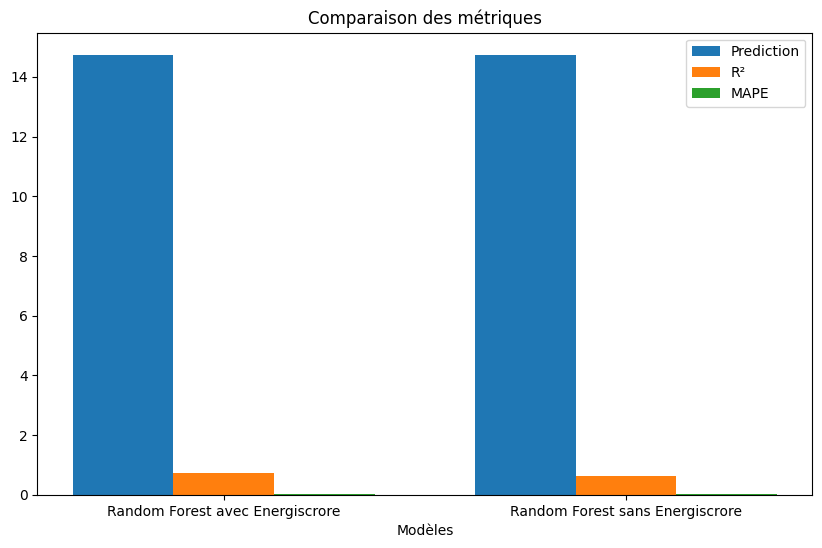

In [202]:
def compare_metrics(y_true, y_pred_rfe,  y_pred_rf):
    # Calcul des métriques pour chaque modèle
    
    # Calcul du taux de prédictions entre 90% et 110% de la valeur réelle
    prediction_rfe = ((np.exp2(y_pred_test) >= 0.9 * np.exp2(y_en_test)) & (np.exp2(y_pred_test) <= 1.1 * np.exp2(y_en_test))).mean() * 100 
    prediction_rf= ((np.exp2(y_pred_test) >= 0.9 * np.exp2(y_en_test)) & (np.exp2(y_pred_test) <= 1.1 * np.exp2(y_en_test))).mean() * 100 

    r2_rfe = r2_score(y_true, y_pred_rfe)
    r2_rf = r2_score(y_true, y_pred_rf)
    
    mape_rfe = mean_absolute_percentage_error(y_true, y_pred_rfe)
    mape_rf = mean_absolute_percentage_error(y_true, y_pred_rf)
    
    # Noms des modèles
    models = ['Random Forest avec Energiscrore', 'Random Forest sans Energiscrore']
    
    # Métriques
    prediction_scores = [prediction_rfe, prediction_rf]
    r2_scores = [r2_rfe, r2_rf]
    mape_scores = [mape_rfe,mape_rf]
    
    # Création du graphique
    fig, ax = plt.subplots(figsize=(10, 6))
    x = np.arange(len(models))
    width = 0.25
    
    # Barres pour le RMSE
    ax.bar(x - width, prediction_scores, width, label='Prediction')
    # Barres pour le R²
    ax.bar(x, r2_scores, width, label='R²')
    # Barres pour le MAPE
    ax.bar(x + width, mape_scores, width, label='MAPE')
    
    # Configurations de l'axe des x
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.set_xlabel('Modèles')
    
    # Légende et titre du graphique
    ax.legend()
    ax.set_title('Comparaison des métriques')
    
    # Affichage du graphique
    plt.show()


# y_pred_test_rf = rfr_search.predict(X_test)

# Exemple d'utilisation de la fonction
compare_metrics(y_en_test, y_pred_test_rfe, y_pred_test_rf)


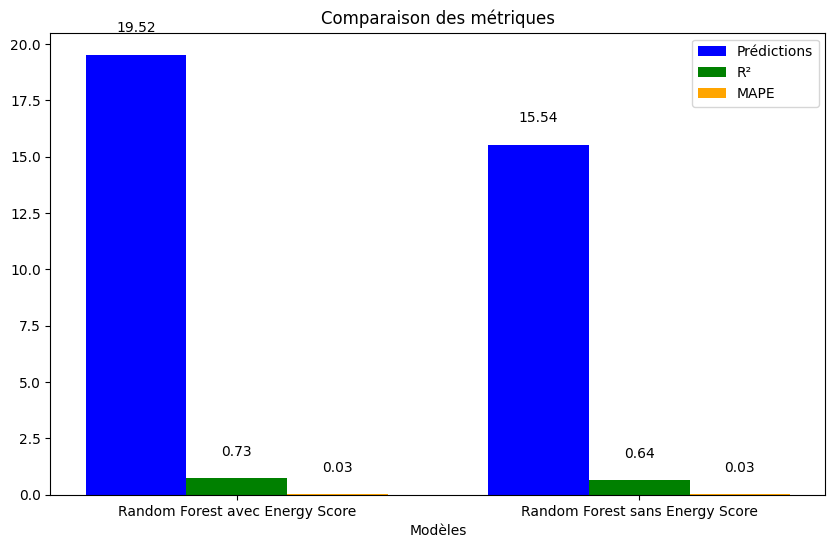

In [203]:
import matplotlib.pyplot as plt
import numpy as np

def compare_metrics_rfe(y_true, y_pred_rfe, y_pred_rf):
    # Calcul des métriques pour chaque modèle
    
    # Calcul du taux de prédictions entre 90% et 110% de la valeur réelle
    prediction_rfe = ((np.exp2(y_pred_rfe) >= 0.9 * np.exp2(y_true)) & (np.exp2(y_pred_rfe) <= 1.1 * np.exp2(y_true))).mean() * 100 
    prediction_rf = ((np.exp2(y_pred_rf) >= 0.9 * np.exp2(y_true)) & (np.exp2(y_pred_rf) <= 1.1 * np.exp2(y_true))).mean() * 100 

    r2_rfe = r2_score(y_true, y_pred_rfe)
    r2_rf = r2_score(y_true, y_pred_rf)
    
    mape_rfe = mean_absolute_percentage_error(y_true, y_pred_rfe)
    mape_rf = mean_absolute_percentage_error(y_true, y_pred_rf)
    
    # Noms des modèles
    models = ['Random Forest avec Energy Score', 'Random Forest sans Energy Score']
    
    # Métriques
    prediction_scores = [prediction_rfe, prediction_rf]
    r2_scores = [r2_rfe, r2_rf]
    mape_scores = [mape_rfe, mape_rf]
    
    # Création du graphique
    fig, ax = plt.subplots(figsize=(10, 6))
    x = np.arange(len(models))
    width = 0.25
    
    # Barres pour les prédictions
    ax.bar(x - width, prediction_scores, width, label='Prédictions', color='blue')
    # Barres pour le R²
    ax.bar(x, r2_scores, width, label='R²', color='green')
    # Barres pour le MAPE
    ax.bar(x + width, mape_scores, width, label='MAPE', color='orange')
    
    # Ajout des valeurs sur les barres
    for i, val in enumerate(prediction_scores):
        ax.text(i - width, val + 1, f'{val:.2f}', ha='center')
    for i, val in enumerate(r2_scores):
        ax.text(i, val + 1, f'{val:.2f}', ha='center')
    for i, val in enumerate(mape_scores):
        ax.text(i + width, val + 1, f'{val:.2f}', ha='center')

    # Configurations de l'axe des x
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.set_xlabel('Modèles')
    
    # Légende et titre du graphique
    ax.legend()
    ax.set_title('Comparaison des métriques')
    
    # Affichage du graphique
    plt.show()


compare_metrics_rfe(y_en_test, y_pred_test_rfe, y_pred_test_rf)


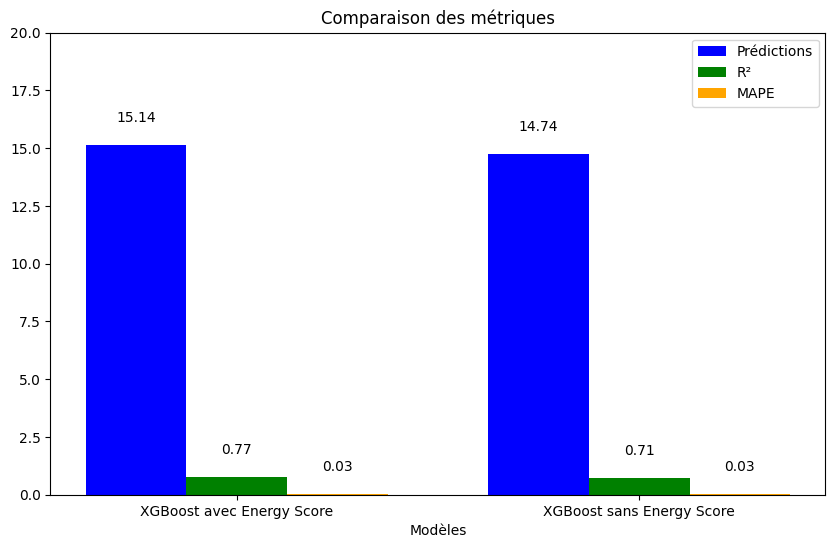

In [204]:
import matplotlib.pyplot as plt
import numpy as np

def compare_metrics_xgb(y_true, y_pred_xgb, y_pred_xg):
    # Calcul des métriques pour chaque modèle
    
    # Calcul du taux de prédictions entre 90% et 110% de la valeur réelle
    prediction_xgb = ((np.exp2(y_pred_xgb) >= 0.9 * np.exp2(y_true)) & (np.exp2(y_pred_xgb) <= 1.1 * np.exp2(y_true))).mean() * 100 
    prediction_xb = ((np.exp2(y_pred_xg) >= 0.9 * np.exp2(y_true)) & (np.exp2(y_pred_xg) <= 1.1 * np.exp2(y_true))).mean() * 100 

    r2_rfe = r2_score(y_true, y_pred_xgb)
    r2_rf = r2_score(y_true, y_pred_xg)
    
    mape_rfe = mean_absolute_percentage_error(y_true, y_pred_xgb)
    mape_rf = mean_absolute_percentage_error(y_true, y_pred_xg)
    
    # Noms des modèles
    models = ['XGBoost avec Energy Score', 'XGBoost sans Energy Score']
    
    # Métriques
    prediction_scores = [prediction_xgb, prediction_xb]
    r2_scores = [r2_rfe, r2_rf]
    mape_scores = [mape_rfe, mape_rf]
    
    # Création du graphique
    fig, ax = plt.subplots(figsize=(10, 6))
    x = np.arange(len(models))
    width = 0.25
    
    # Barres pour les prédictions
    ax.bar(x - width, prediction_scores, width, label='Prédictions', color='blue')
    # Barres pour le R²
    ax.bar(x, r2_scores, width, label='R²', color='green')
    # Barres pour le MAPE
    ax.bar(x + width, mape_scores, width, label='MAPE', color='orange')
    
    # Ajout des valeurs sur les barres
    for i, val in enumerate(prediction_scores):
        ax.text(i - width, val + 1, f'{val:.2f}', ha='center')
    for i, val in enumerate(r2_scores):
        ax.text(i, val + 1, f'{val:.2f}', ha='center')
    for i, val in enumerate(mape_scores):
        ax.text(i + width, val + 1, f'{val:.2f}', ha='center')

    # Configurations de l'axe des x
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.set_xlabel('Modèles')
    plt.ylim([0,20])
    # Légende et titre du graphique
    ax.legend()
    ax.set_title('Comparaison des métriques')
    
    # Affichage du graphique
    plt.show()


compare_metrics_xgb(y_en_test, y_pred_test_xgb, y_pred_test_xb)
